# Study Overview

In this study, we are trying to analyze the psychophysiological data i.e. EDA and Temperature in 2 scenarios: 

* How EDA varies when the person is showering on his own and when the person is showering when the other is present.


      -whether the perceived pain and stress is less when the partner is present
* How EDA is changing over time while showering 
* How EDA and HR differ over the test periods (on day basis)

# Import Library

In [1]:
import numpy as np 
# import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cvxEDA
import datetime
from scipy import stats
from mpl_toolkits import mplot3d
import pylab as pl
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.stats import ks_2samp

sns.set(color_codes = True)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Load the data

## EDA

### Day 0

In [2]:
# Sampling frequency 4Hz ~= 0.25s
fl_eda_0 = pd.read_csv('data/exp_1/EDA.csv' , header= None)
fl_eda_0.columns  = ['eda']
fl_eda_freq_0 = fl_eda_0.iloc[1].values
print(len(fl_eda_0))
print('freq: ', fl_eda_freq_0)
fl_eda_0.head(10)

1232
freq:  [4.]


eda
0  1.526949e+09
1  4.000000e+00
2  0.000000e+00
3  3.446160e-01
4  4.150760e-01
5  4.278870e-01
6  4.330120e-01
7  4.227630e-01
8  3.804870e-01
9  3.881730e-01

In [3]:
fl_init_time_0 = datetime.datetime.utcfromtimestamp(fl_eda_0.iloc[0]).strftime('%Y-%m-%d %H:%M:%S')
fl_init_time_0

'2018-05-22 00:29:47'

In [4]:
fl_eda_0 = fl_eda_0.iloc[3:]
fl_eda_0.head(5)

eda
3  0.344616
4  0.415076
5  0.427887
6  0.433012
7  0.422763

In [5]:
#create index 
fl_time_eda_0 = pd.date_range(start=fl_init_time_0, periods=len(fl_eda_0), freq=str(1/int(fl_eda_freq_0))+'S')
fl_time_eda_0

DatetimeIndex([       '2018-05-22 00:29:47', '2018-05-22 00:29:47.250000',
               '2018-05-22 00:29:47.500000', '2018-05-22 00:29:47.750000',
                      '2018-05-22 00:29:48', '2018-05-22 00:29:48.250000',
               '2018-05-22 00:29:48.500000', '2018-05-22 00:29:48.750000',
                      '2018-05-22 00:29:49', '2018-05-22 00:29:49.250000',
               ...
               '2018-05-22 00:34:51.750000',        '2018-05-22 00:34:52',
               '2018-05-22 00:34:52.250000', '2018-05-22 00:34:52.500000',
               '2018-05-22 00:34:52.750000',        '2018-05-22 00:34:53',
               '2018-05-22 00:34:53.250000', '2018-05-22 00:34:53.500000',
               '2018-05-22 00:34:53.750000',        '2018-05-22 00:34:54'],
              dtype='datetime64[ns]', length=1229, freq='250L')

In [6]:
fl_eda_0 = fl_eda_0.set_index(fl_time_eda_0, drop =True)
fl_eda_0.head()

eda
2018-05-22 00:29:47.000  0.344616
2018-05-22 00:29:47.250  0.415076
2018-05-22 00:29:47.500  0.427887
2018-05-22 00:29:47.750  0.433012
2018-05-22 00:29:48.000  0.422763

In [7]:
# eda = eda.rolling(4).sum()
# fl_eda = fl_eda.iloc[::4,:]
fl_eda_0 = fl_eda_0[12:-12]
fl_eda_0 = fl_eda_0.dropna()
print(len(fl_eda_0))
fl_eda_0.head()

1205


eda
2018-05-22 00:29:50.000  0.431731
2018-05-22 00:29:50.250  0.430450
2018-05-22 00:29:50.500  0.418920
2018-05-22 00:29:50.750  0.402265
2018-05-22 00:29:51.000  0.381768

### Day 1

In [8]:
# Sampling frequency 4Hz ~= 0.25s
fl_eda_1 = pd.read_csv('data/exp_2/EDA.csv' , header= None)
fl_eda_1.columns  = ['eda']
fl_eda_freq_1 = fl_eda_1.iloc[1].values
print(len(fl_eda_1))
print('freq: ', fl_eda_freq_1)
fl_eda_1.head(10)

2120
freq:  [4.]


eda
0  1.527038e+09
1  4.000000e+00
2  0.000000e+00
3  2.062570e-01
4  3.523020e-01
5  3.561460e-01
6  3.548650e-01
7  3.574270e-01
8  3.574270e-01
9  3.369290e-01

In [9]:
fl_init_time_1 = datetime.datetime.utcfromtimestamp(fl_eda_1.iloc[0]).strftime('%Y-%m-%d %H:%M:%S')
fl_init_time_1

'2018-05-23 01:09:12'

In [10]:
fl_eda_1 = fl_eda_1.iloc[3:]
fl_eda_1.head(5)

eda
3  0.206257
4  0.352302
5  0.356146
6  0.354865
7  0.357427

In [11]:
#create index 
fl_time_eda_1 = pd.date_range(start=fl_init_time_1, periods=len(fl_eda_1), freq=str(1/int(fl_eda_freq_1))+'S')
fl_time_eda_1

DatetimeIndex([       '2018-05-23 01:09:12', '2018-05-23 01:09:12.250000',
               '2018-05-23 01:09:12.500000', '2018-05-23 01:09:12.750000',
                      '2018-05-23 01:09:13', '2018-05-23 01:09:13.250000',
               '2018-05-23 01:09:13.500000', '2018-05-23 01:09:13.750000',
                      '2018-05-23 01:09:14', '2018-05-23 01:09:14.250000',
               ...
               '2018-05-23 01:17:58.750000',        '2018-05-23 01:17:59',
               '2018-05-23 01:17:59.250000', '2018-05-23 01:17:59.500000',
               '2018-05-23 01:17:59.750000',        '2018-05-23 01:18:00',
               '2018-05-23 01:18:00.250000', '2018-05-23 01:18:00.500000',
               '2018-05-23 01:18:00.750000',        '2018-05-23 01:18:01'],
              dtype='datetime64[ns]', length=2117, freq='250L')

In [12]:
fl_eda_1 = fl_eda_1.set_index(fl_time_eda_1, drop =True)
fl_eda_1.head()

eda
2018-05-23 01:09:12.000  0.206257
2018-05-23 01:09:12.250  0.352302
2018-05-23 01:09:12.500  0.356146
2018-05-23 01:09:12.750  0.354865
2018-05-23 01:09:13.000  0.357427

In [13]:
# eda = eda.rolling(4).sum()
# fl_eda = fl_eda.iloc[::4,:]
fl_eda_1 = fl_eda_1[12:-12]
fl_eda_1 = fl_eda_1.dropna()
print(len(fl_eda_1))
fl_eda_1.head()

2093


eda
2018-05-23 01:09:15.000  0.354865
2018-05-23 01:09:15.250  0.356146
2018-05-23 01:09:15.500  0.353584
2018-05-23 01:09:15.750  0.352302
2018-05-23 01:09:16.000  0.353584

### Day 2

In [14]:
# Sampling frequency 4Hz ~= 0.25s
fl_eda_2 = pd.read_csv('data/exp_3/EDA.csv' , header= None)
fl_eda_2.columns  = ['eda']
fl_eda_freq_2 = fl_eda_2.iloc[1].values
print(len(fl_eda_2))
print('freq: ', fl_eda_freq_2)
fl_eda_2.head(10)

1664
freq:  [4.]


eda
0  1.527124e+09
1  4.000000e+00
2  0.000000e+00
3  4.125140e-01
4  4.688830e-01
5  4.765690e-01
6  4.740070e-01
7  4.765690e-01
8  4.765690e-01
9  4.765690e-01

In [15]:
fl_init_time_2 = datetime.datetime.utcfromtimestamp(fl_eda_2.iloc[0]).strftime('%Y-%m-%d %H:%M:%S')
fl_init_time_2

'2018-05-24 01:07:49'

In [16]:
fl_eda_2 = fl_eda_2.iloc[3:]
fl_eda_2.head(5)

eda
3  0.412514
4  0.468883
5  0.476569
6  0.474007
7  0.476569

In [17]:
#create index 
fl_time_eda_2 = pd.date_range(start=fl_init_time_2, periods=len(fl_eda_2), freq=str(1/int(fl_eda_freq_2))+'S')
fl_time_eda_2

DatetimeIndex([       '2018-05-24 01:07:49', '2018-05-24 01:07:49.250000',
               '2018-05-24 01:07:49.500000', '2018-05-24 01:07:49.750000',
                      '2018-05-24 01:07:50', '2018-05-24 01:07:50.250000',
               '2018-05-24 01:07:50.500000', '2018-05-24 01:07:50.750000',
                      '2018-05-24 01:07:51', '2018-05-24 01:07:51.250000',
               ...
               '2018-05-24 01:14:41.750000',        '2018-05-24 01:14:42',
               '2018-05-24 01:14:42.250000', '2018-05-24 01:14:42.500000',
               '2018-05-24 01:14:42.750000',        '2018-05-24 01:14:43',
               '2018-05-24 01:14:43.250000', '2018-05-24 01:14:43.500000',
               '2018-05-24 01:14:43.750000',        '2018-05-24 01:14:44'],
              dtype='datetime64[ns]', length=1661, freq='250L')

In [18]:
fl_eda_2 = fl_eda_2.set_index(fl_time_eda_2, drop =True)
fl_eda_2.head()

eda
2018-05-24 01:07:49.000  0.412514
2018-05-24 01:07:49.250  0.468883
2018-05-24 01:07:49.500  0.476569
2018-05-24 01:07:49.750  0.474007
2018-05-24 01:07:50.000  0.476569

In [19]:
# eda = eda.rolling(4).sum()
# fl_eda = fl_eda.iloc[::4,:]
fl_eda_2 = fl_eda_2[12:-12]
fl_eda_2 = fl_eda_2.dropna()
print(len(fl_eda_2))
fl_eda_2.head()

1637


eda
2018-05-24 01:07:52.000  0.474007
2018-05-24 01:07:52.250  0.475288
2018-05-24 01:07:52.500  0.472726
2018-05-24 01:07:52.750  0.472726
2018-05-24 01:07:53.000  0.472726

### Visualization

#### Remove Outliers

In [20]:
tempfl_exp0 = fl_eda_0.copy()#example dataset of normally distributed data. 
fl_exp0= fl_exp0[np.abs(fl_exp0.eda-fl_exp0.eda.mean())<=(3*fl_exp0.eda.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
fl_exp0= fl_exp0[~(np.abs(fl_exp0.eda-fl_exp0.eda.mean())>(3*fl_exp0.eda.std()))] #or if you prefer the other way around

print(len(fl_exp0))
fl_exp0.eda[:10]


1195


2018-05-22 00:29:50.750    0.402265
2018-05-22 00:29:51.000    0.381768
2018-05-22 00:29:51.250    0.372800
2018-05-22 00:29:51.500    0.379206
2018-05-22 00:29:51.750    0.376643
2018-05-22 00:29:52.000    0.354865
2018-05-22 00:29:52.250    0.340773
2018-05-22 00:29:52.500    0.362551
2018-05-22 00:29:52.750    0.370238
2018-05-22 00:29:53.000    0.359989
Name: eda, dtype: float64

In [21]:
fl_exp1 = fl_eda_1.copy()#example dataset of normally distributed data. 
fl_exp1= fl_exp1[np.abs(fl_exp1.eda-fl_exp1.eda.mean())<=(3*fl_exp1.eda.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
fl_exp1= fl_exp1[~(np.abs(fl_exp1.eda-fl_exp1.eda.mean())>(3*fl_exp1.eda.std()))] #or if you prefer the other way around

print(len(fl_exp1))
fl_exp1.eda[:10]


2044


2018-05-23 01:09:15.000    0.354865
2018-05-23 01:09:15.250    0.356146
2018-05-23 01:09:15.500    0.353584
2018-05-23 01:09:15.750    0.352302
2018-05-23 01:09:16.000    0.353584
2018-05-23 01:09:16.250    0.352302
2018-05-23 01:09:16.500    0.352302
2018-05-23 01:09:16.750    0.351021
2018-05-23 01:09:17.000    0.351021
2018-05-23 01:09:17.250    0.352302
Name: eda, dtype: float64

In [22]:
fl_exp2 = fl_eda_2.copy()#example dataset of normally distributed data. 
fl_exp2= fl_exp2[np.abs(fl_exp2.eda-fl_exp2.eda.mean())<=(3*fl_exp2.eda.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
fl_exp2= fl_exp2[~(np.abs(fl_exp2.eda-fl_exp2.eda.mean())>(3*fl_exp2.eda.std()))] #or if you prefer the other way around

print(len(fl_exp2))
fl_exp2.eda[:10]


1619


2018-05-24 01:07:52.000    0.474007
2018-05-24 01:07:52.250    0.475288
2018-05-24 01:07:52.500    0.472726
2018-05-24 01:07:52.750    0.472726
2018-05-24 01:07:53.000    0.472726
2018-05-24 01:07:53.250    0.471445
2018-05-24 01:07:53.500    0.470164
2018-05-24 01:07:53.750    0.470164
2018-05-24 01:07:54.000    0.470164
2018-05-24 01:07:54.250    0.468883
Name: eda, dtype: float64

## Day 3

## Day 4


### Histogram

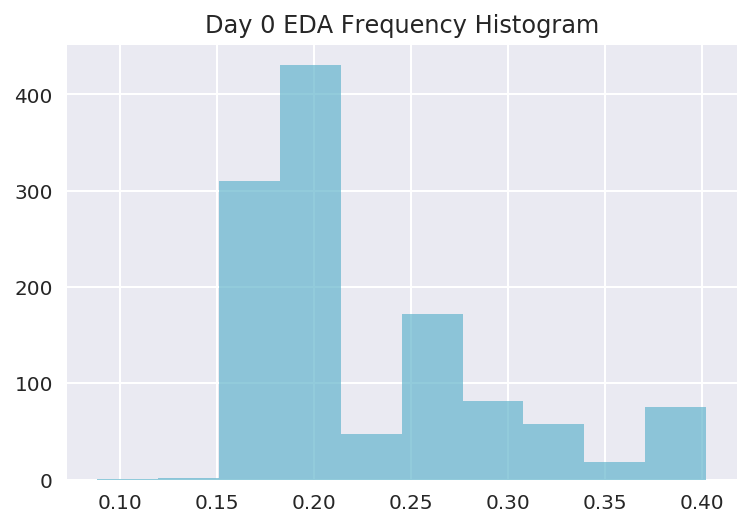

In [23]:
plt.hist(fl_exp0.eda, color = 'c', alpha = 0.7)
plt.title('Day 0 EDA Frequency Histogram')
plt.show()

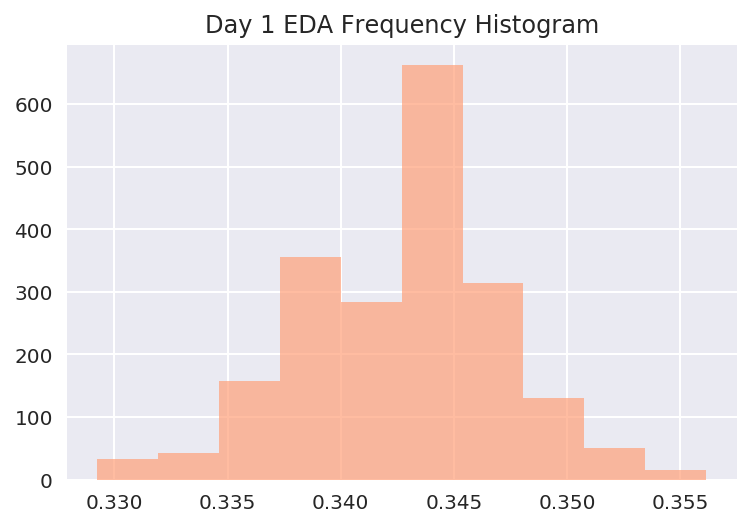

In [24]:
plt.hist(fl_exp1.eda, color = 'lightsalmon', alpha = 0.7)
plt.title('Day 1 EDA Frequency Histogram')
plt.show()

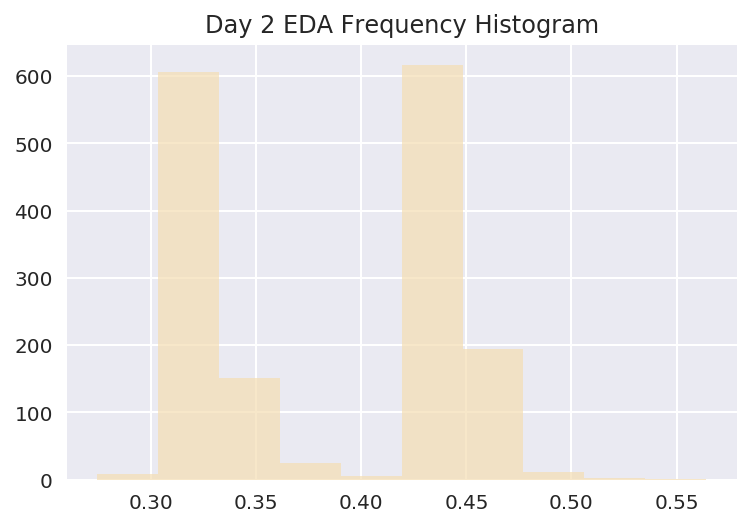

In [25]:
plt.hist(fl_exp2.eda, color = 'wheat', alpha = 0.7)
plt.title('Day 2 EDA Frequency Histogram')
plt.show()

#### Time-series Plot

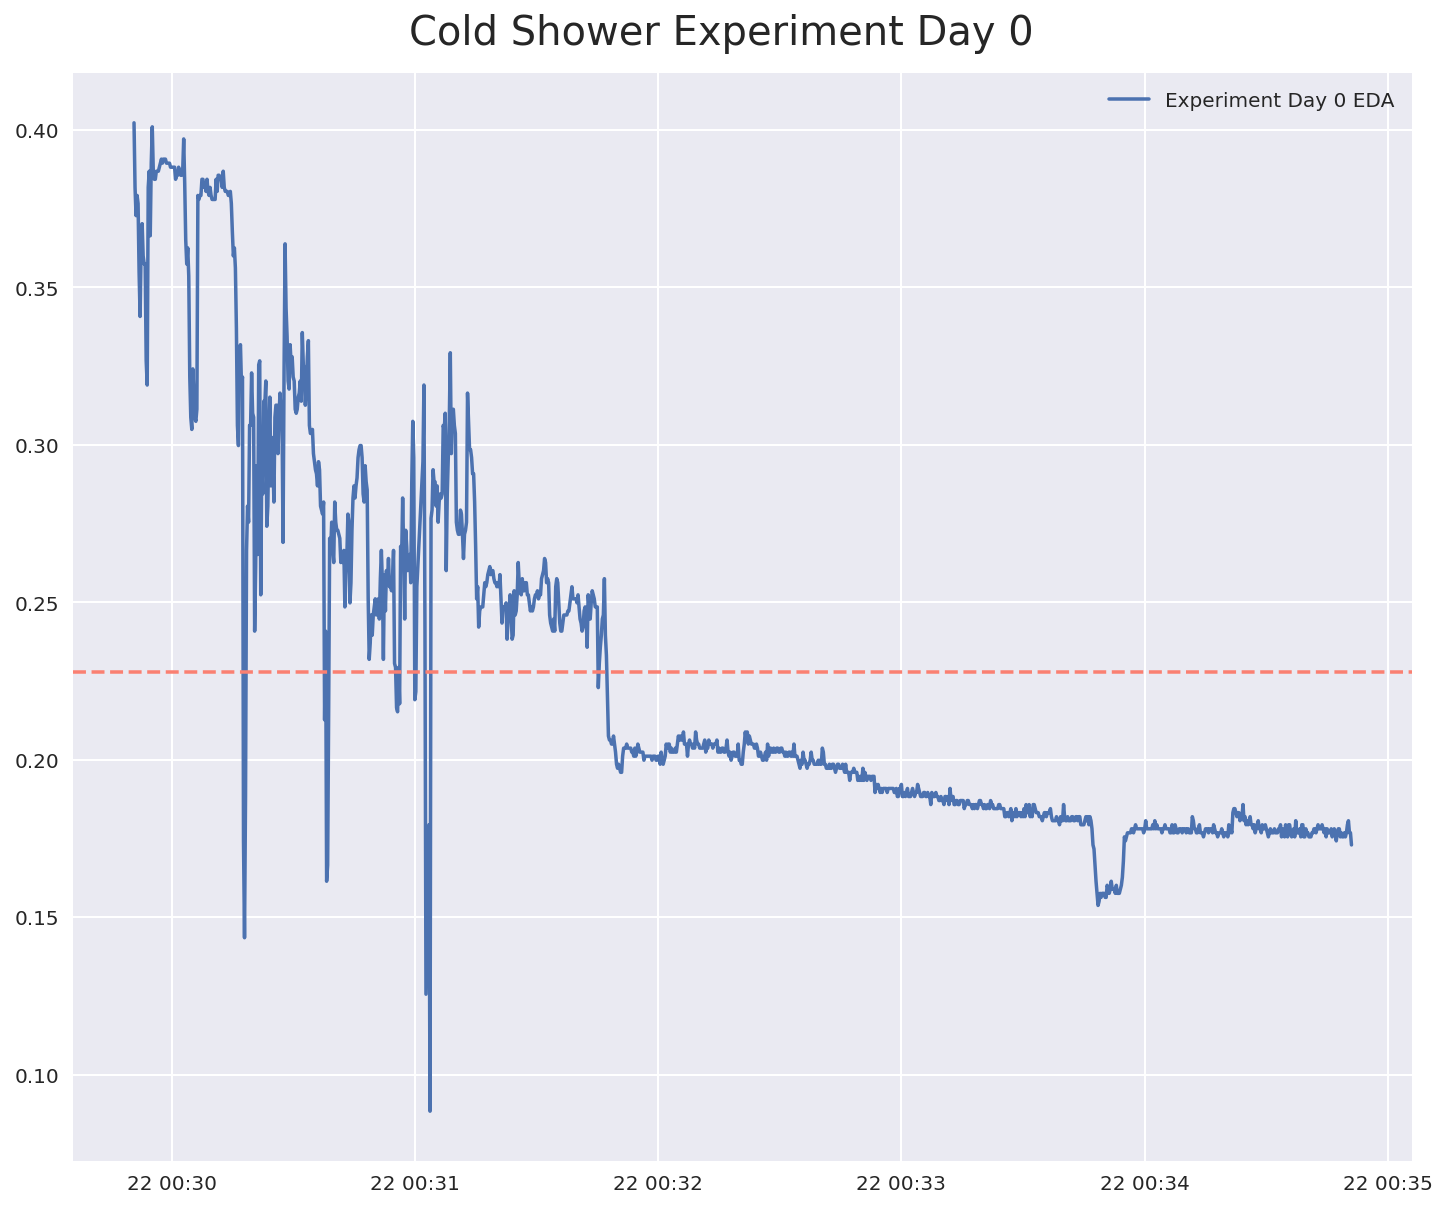

In [26]:
y_mean = np.mean(fl_exp0.eda)
plt.figure(figsize=(12,10))
plt.plot(fl_exp0)
plt.legend(['Experiment Day 0 EDA'],loc=1,fontsize='medium')
plt.axhline(y = y_mean,color = 'salmon',linestyle='--')
# plt.title('Cold Shower Experiment Day 0')
plt.figtext(.5,.9,'Cold Shower Experiment Day 0', fontsize=20, ha='center')
plt.show()

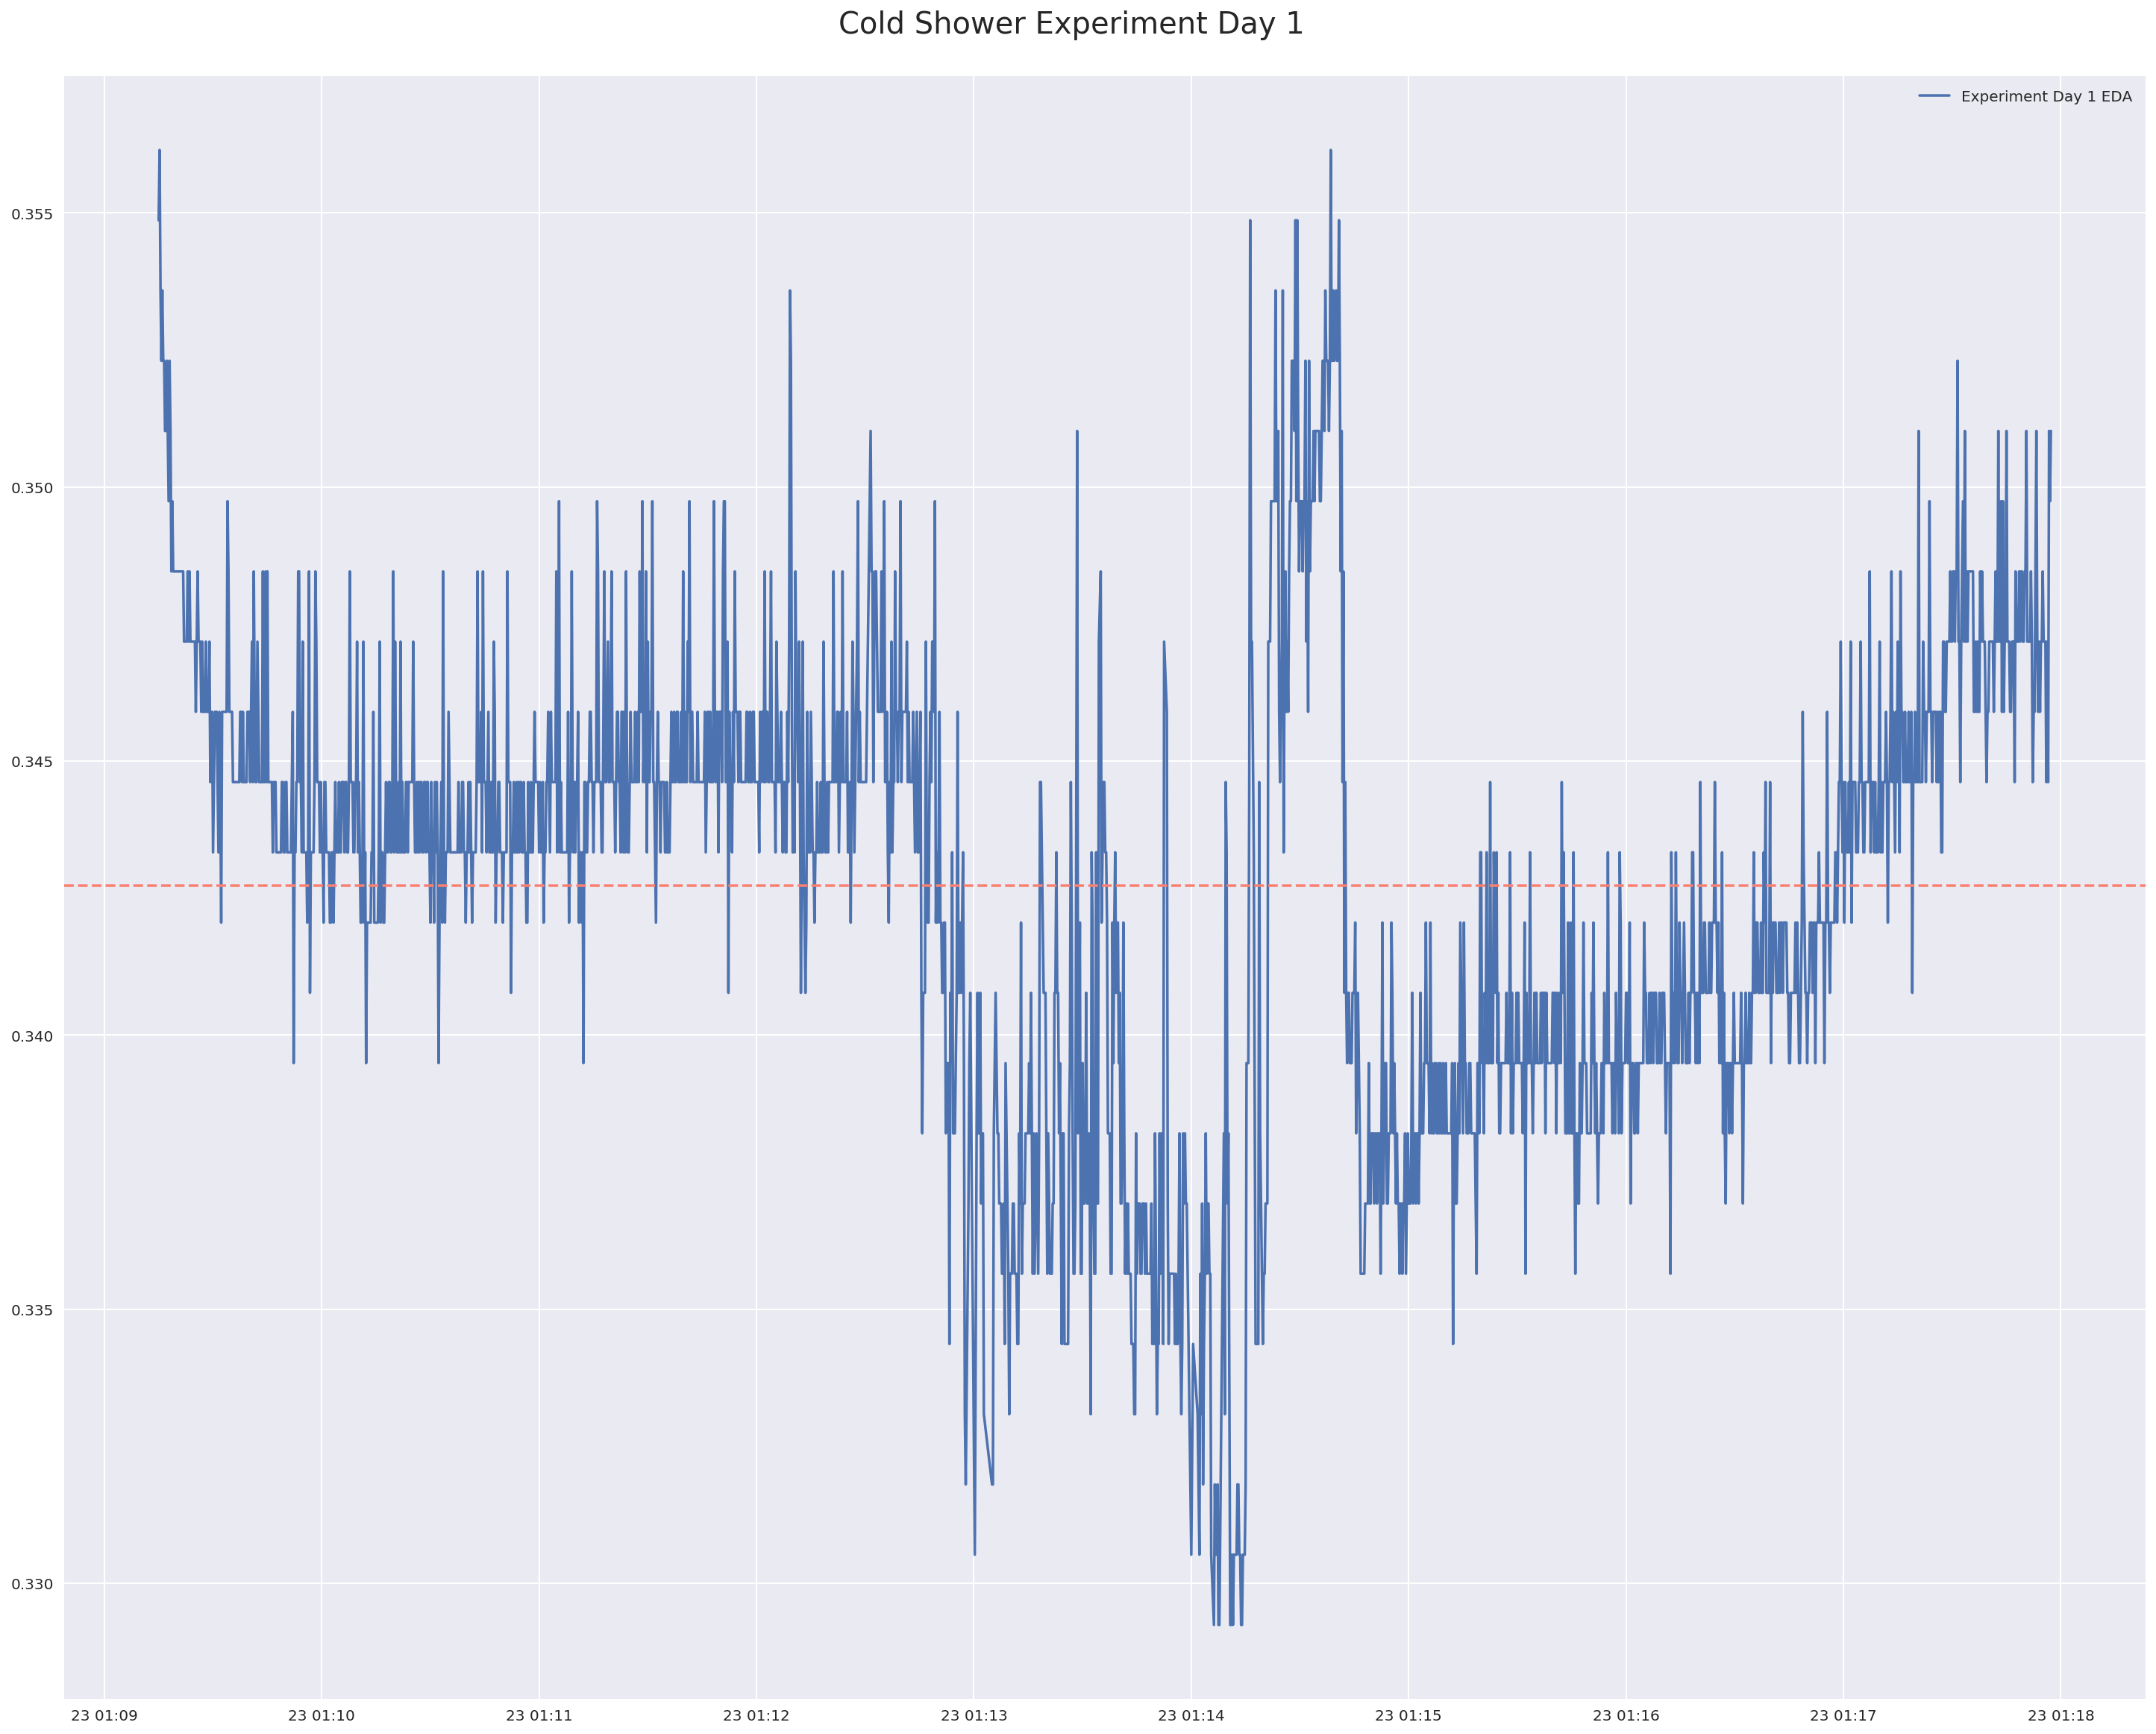

In [27]:
y_mean = np.mean(fl_exp1.eda)
plt.figure(figsize=(25,20))
plt.plot(fl_exp1)
plt.legend(['Experiment Day 1 EDA'],loc=1,fontsize='medium')
plt.axhline(y = y_mean,color = 'salmon',linestyle='--')
# plt.title('Cold Shower Experiment Day 0')
plt.figtext(.5,.9,'Cold Shower Experiment Day 1', fontsize=20, ha='center')
plt.show()

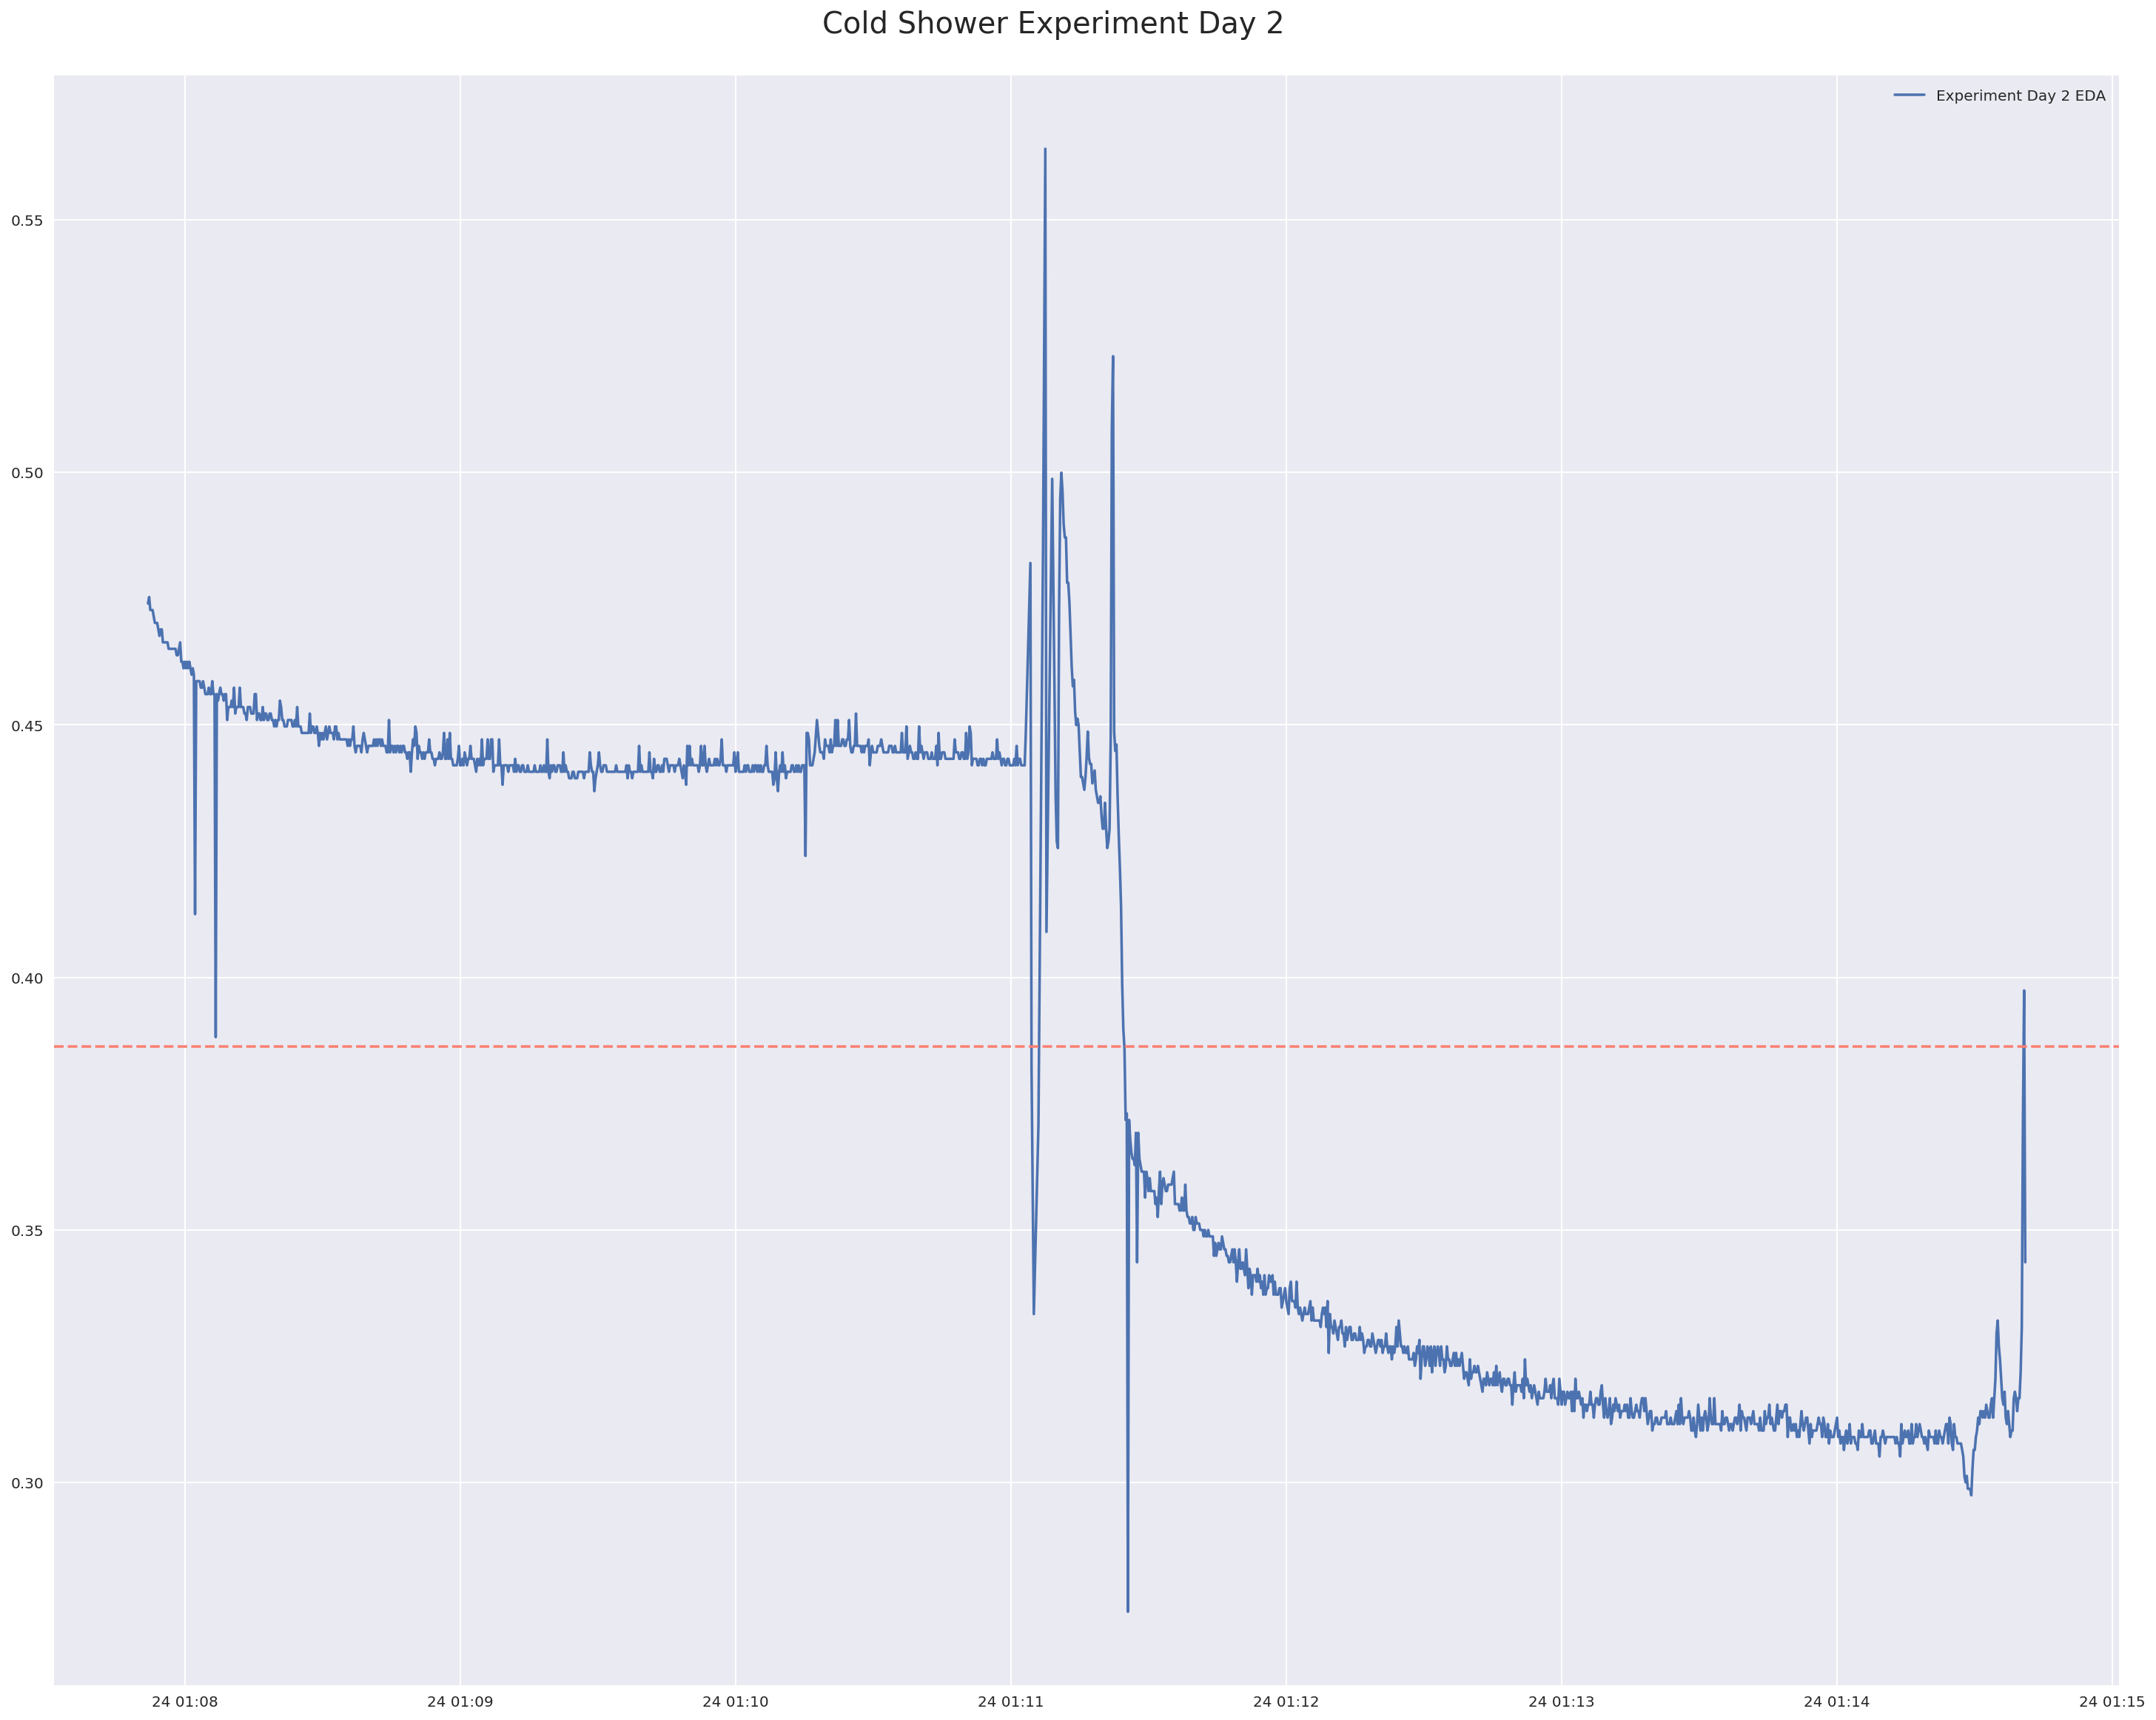

In [28]:
y_mean = np.mean(fl_exp2.eda)
plt.figure(figsize=(25,20))
plt.plot(fl_exp2)
plt.legend(['Experiment Day 2 EDA'],loc=1,fontsize='medium')
plt.axhline(y = y_mean,color = 'salmon',linestyle='--')
# plt.title('Cold Shower Experiment Day 0')
plt.figtext(.5,.9,'Cold Shower Experiment Day 2', fontsize=20, ha='center')
plt.show()

### Day 1


I consider the experiment is 3 minutes and the sampling frequencyf is 4Hz which is 0.25s per record. We can take 720 records based on this frequency. We then exclude the last 3 second which might be the dalay of the process of truning off the wristband. 

In turn we will first exclude the last 3 *4 = 12 records which include 720 + 12 = 732 records into our analysis as the experimental period every day .

In [29]:
fl_day0 = fl_exp0[-720:]
fl_day1 = fl_exp1[-720:]
fl_day2 = fl_exp2[-720:]

In [30]:
fl_day0_t = np.squeeze(fl_day0)
fl_day1_t = np.squeeze(fl_day1)
fl_day2_t = np.squeeze(fl_day2)

## EDA Analysis

## CR 

 **r**: phasic component
     
 
 **p**: sparse SMNA driver of phasic component
     
     
 **t**: tonic component
     
     
 **l**: coefficients of tonic spline
     
     
 **d**: offset and slope of the linear drift term
 
 
 **e**: model residuals
 
 
 **obj**: value of objective function being minimized (eq 15 of paper)

### Day 0

In [31]:
y0 = np.asarray(fl_exp0.eda)
y0[:10]

array([0.402265, 0.381768, 0.3728  , 0.379206, 0.376643, 0.354865,
       0.340773, 0.362551, 0.370238, 0.359989])

In [32]:
yn0 = (y0 - y0.mean()) / y0.std()
Fs = 4.
[r0, p0, t0, l0, d0, e0, obj0] = cvxEDA.cvxEDA(yn0, 1./Fs)

# pl.rcParams['figure.figsize'] = (30,20)
tm0 = pl.arange(1., len(y0)+1.) / Fs


     pcost       dcost       gap    pres   dres
 0: -5.6620e+02 -5.5722e+02  2e+03  5e+01  5e-01
 1: -5.7108e+02 -8.4583e+02  3e+02  7e+00  8e-02
 2: -5.7918e+02 -7.2185e+02  1e+02  3e+00  3e-02
 3: -5.8204e+02 -6.6191e+02  8e+01  1e+00  1e-02
 4: -5.8465e+02 -6.3243e+02  5e+01  6e-01  6e-03
 5: -5.8633e+02 -6.0907e+02  2e+01  2e-01  2e-03
 6: -5.8705e+02 -6.0092e+02  1e+01  1e-01  1e-03
 7: -5.8793e+02 -5.9198e+02  4e+00  2e-02  2e-04
 8: -5.8916e+02 -5.9003e+02  9e-01  3e-03  3e-05
 9: -5.8945e+02 -5.8982e+02  4e-01  7e-04  7e-06
10: -5.8962e+02 -5.8973e+02  1e-01  1e-04  1e-06
11: -5.8967e+02 -5.8970e+02  3e-02  2e-05  2e-07
12: -5.8968e+02 -5.8969e+02  8e-03  3e-06  3e-08
13: -5.8969e+02 -5.8969e+02  2e-03  6e-07  6e-09
14: -5.8969e+02 -5.8969e+02  3e-04  7e-08  7e-10
15: -5.8969e+02 -5.8969e+02  3e-05  2e-09  2e-11
16: -5.8969e+02 -5.8969e+02  2e-06  7e-11  7e-13
17: -5.8969e+02 -5.8969e+02  3e-08  1e-12  1e-13
Optimal solution found.


In [33]:
params = {'legend.fontsize': 'large',
          'figure.figsize': (10, 8),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pl.rcParams.update(params)

In [34]:
print(obj0)

[7.81014068]


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


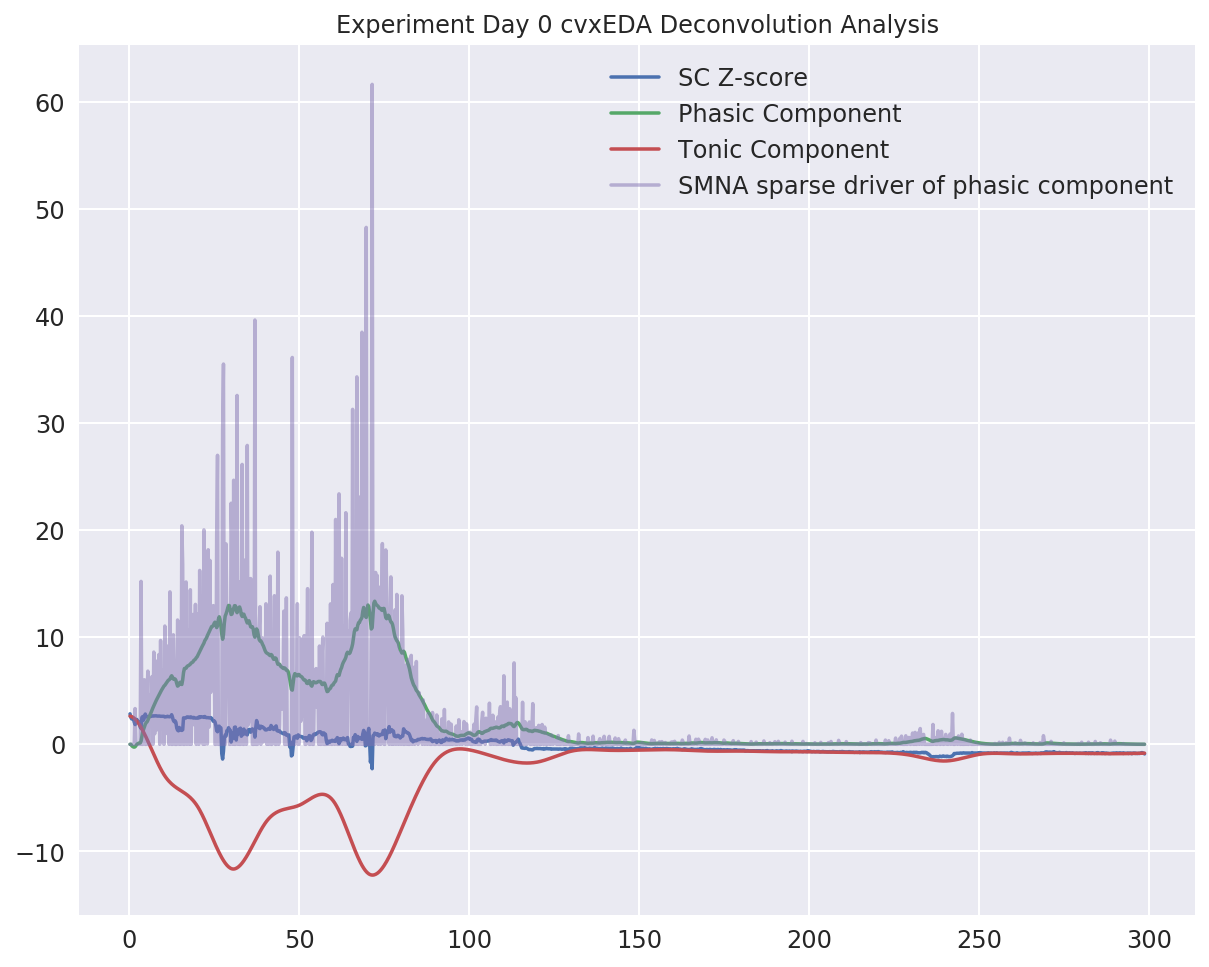

In [35]:
pl.hold(True)
pl.plot(tm0, yn0)
pl.plot(tm0, r0)
pl.plot(tm0, t0)
pl.plot(tm0, p0,alpha=0.5)

pl.title('Experiment Day 0 cvxEDA Deconvolution Analysis')
pl.legend(['SC Z-score','Phasic Component',
           'Tonic Component','SMNA sparse driver of phasic component'])

pl.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


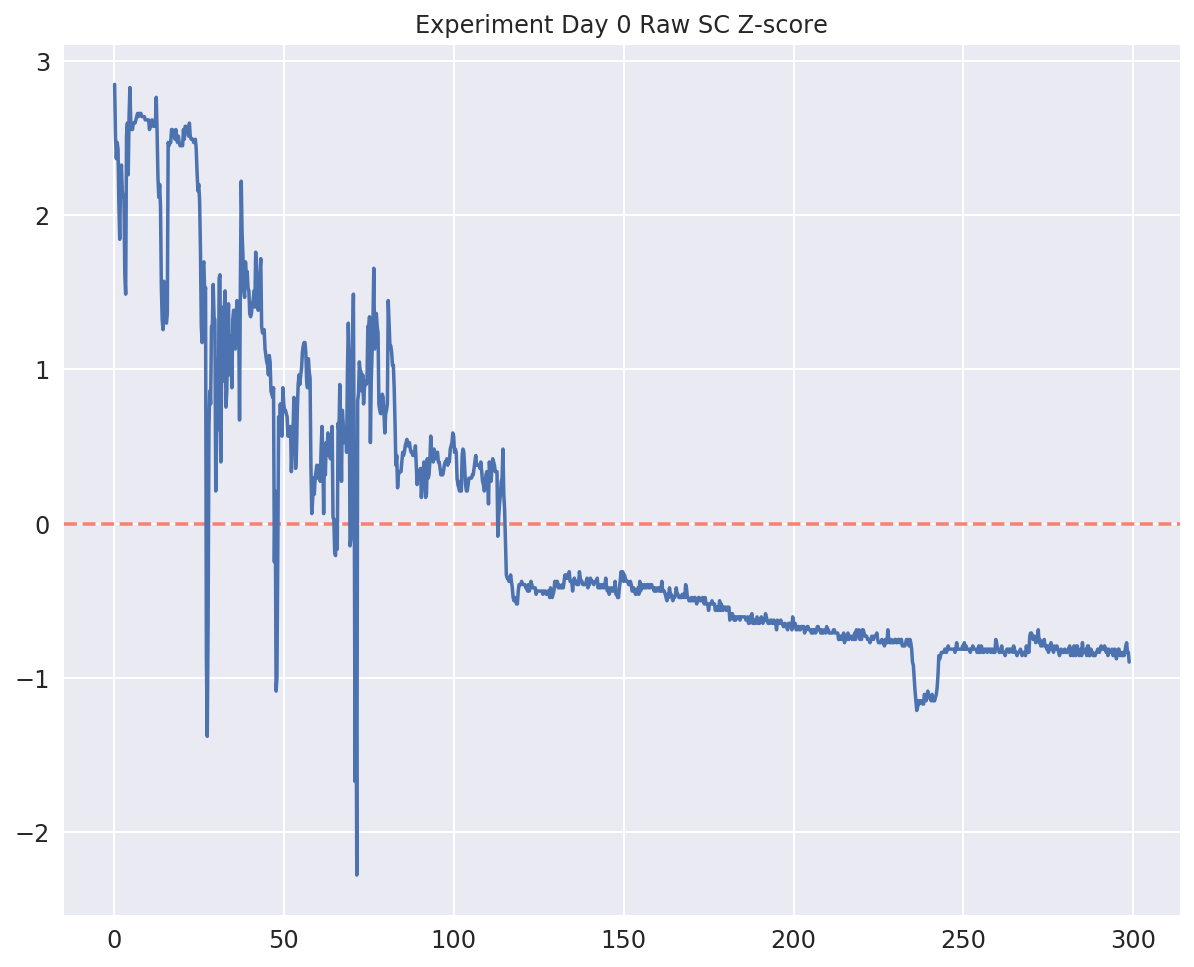

In [36]:
pl.hold(True)
y_mean0 = np.mean(yn0)
plt.axhline(y = y_mean0,color = 'salmon',linestyle='--')
pl.plot(tm0, yn0)
# pl.plot(tm, r)
# pl.plot(tm, p)
# pl.plot(tm, t)
pl.title('Experiment Day 0 Raw SC Z-score')
# pl.legend(['SC series','Phasic Component','SMNA sparse driver of phasic component',
#            'Tonic Component'])

pl.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


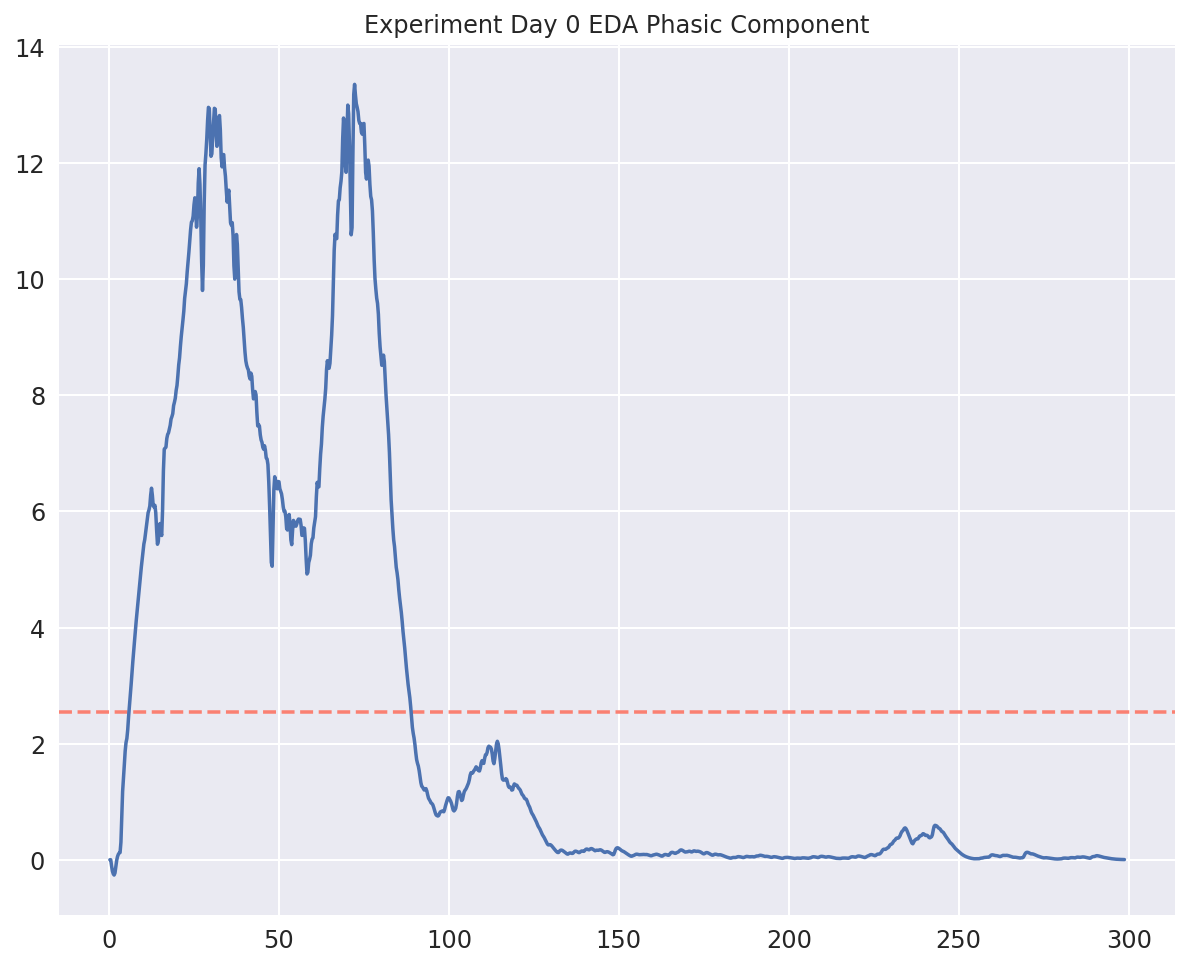

In [37]:
pl.hold(True)
# pl.plot(tm, yn)
r_mean0 = np.mean(r0)
plt.axhline(y = r_mean0,color = 'salmon',linestyle='--')
pl.plot(tm0, r0)
# pl.plot(tm, p)
# pl.plot(tm, t)
pl.title('Experiment Day 0 EDA Phasic Component')
pl.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


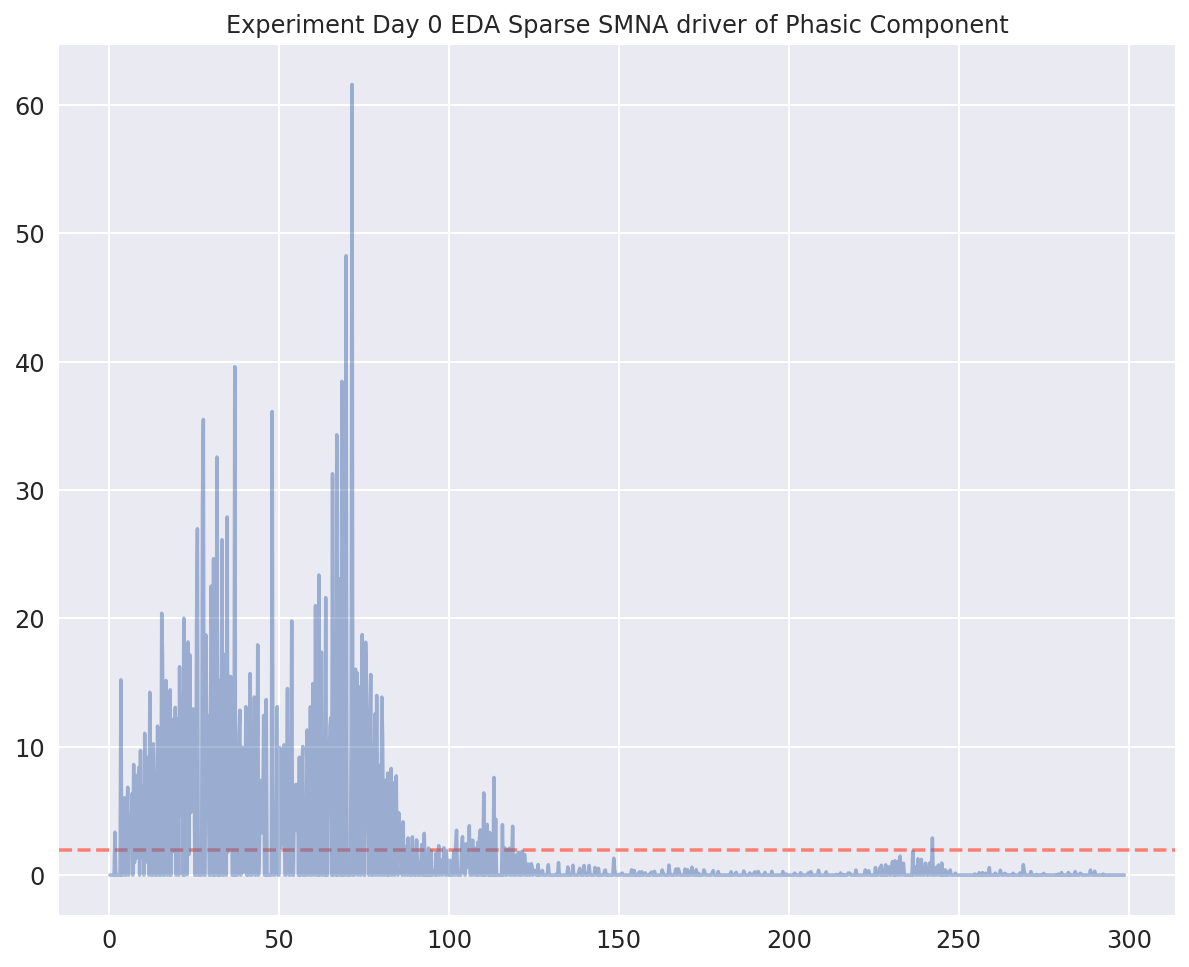

In [38]:
pl.hold(True)
# pl.plot(tm, yn)
# pl.plot(tm, r)
p_mean0 = np.mean(p0)
plt.axhline(y = p_mean0,color = 'salmon',linestyle='--')
pl.plot(tm0, p0, alpha = 0.5)
# pl.plot(tm, t)
pl.title('Experiment Day 0 EDA Sparse SMNA driver of Phasic Component')
pl.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


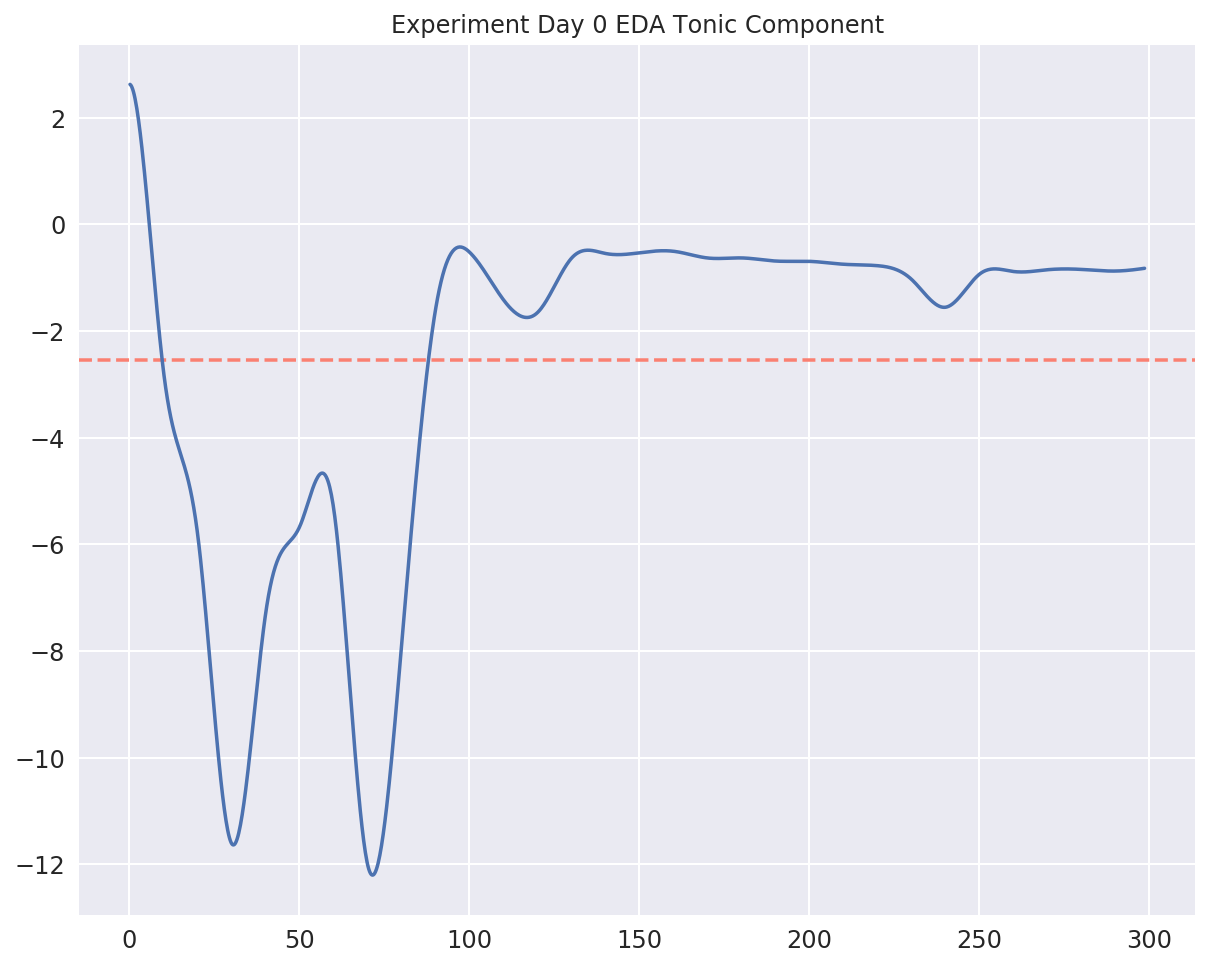

In [39]:
pl.hold(True)
t_mean0 = np.mean(t0)
plt.axhline(y = t_mean0,color = 'salmon',linestyle='--')
# pl.plot(tm, yn)
# pl.plot(tm, r)
# pl.plot(tm, p)
pl.plot(tm0, t0)
pl.title('Experiment Day 0 EDA Tonic Component')
pl.show()

#### Only consider 3 minutes experiment period

In [40]:
y0_3 = np.asarray(fl_day0.eda)
y0_3[:10]

array([0.201133, 0.203695, 0.203695, 0.203695, 0.204976, 0.203695,
       0.203695, 0.203695, 0.203695, 0.202414])

In [41]:
yn0_3 = (y0_3 - y0_3.mean()) / y0_3.std()
Fs = 4.
[r0_3, p0_3, t0_3, l0_3, d0_3, e0_3, obj0_3] = cvxEDA.cvxEDA(yn0_3, 1./Fs)

# pl.rcParams['figure.figsize'] = (30,20)
tm0_3 = pl.arange(1., len(y0_3)+1.) / Fs


     pcost       dcost       gap    pres   dres
 0: -3.5052e+02 -3.4439e+02  1e+03  4e+01  7e-01
 1: -3.5295e+02 -5.1656e+02  2e+02  5e+00  1e-01
 2: -3.5526e+02 -4.0010e+02  5e+01  1e+00  2e-02
 3: -3.5608e+02 -3.6858e+02  1e+01  2e-01  5e-03
 4: -3.5658e+02 -3.5972e+02  3e+00  5e-02  9e-04
 5: -3.5700e+02 -3.5792e+02  9e-01  8e-03  2e-04
 6: -3.5737e+02 -3.5755e+02  2e-01  1e-03  2e-05
 7: -3.5746e+02 -3.5749e+02  3e-02  2e-04  3e-06
 8: -3.5747e+02 -3.5748e+02  6e-03  2e-05  4e-07
 9: -3.5748e+02 -3.5748e+02  4e-04  8e-07  2e-08
10: -3.5748e+02 -3.5748e+02  2e-05  3e-08  6e-10
11: -3.5748e+02 -3.5748e+02  6e-07  6e-10  1e-11
12: -3.5748e+02 -3.5748e+02  2e-08  8e-12  2e-13
Optimal solution found.


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


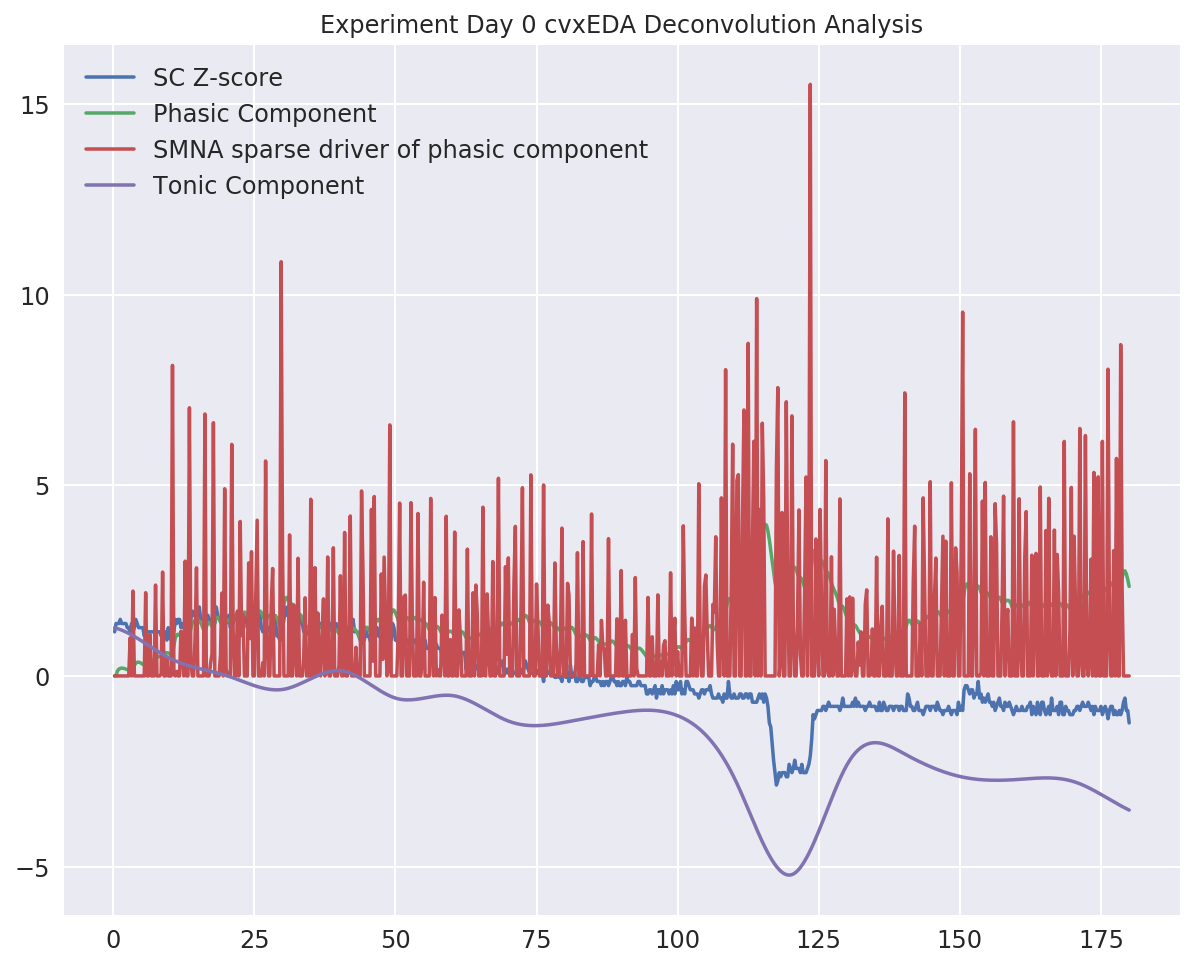

In [42]:
pl.hold(True)
pl.plot(tm0_3, yn0_3)
pl.plot(tm0_3, r0_3)
pl.plot(tm0_3, p0_3)
pl.plot(tm0_3, t0_3)
pl.title('Experiment Day 0 cvxEDA Deconvolution Analysis')
pl.legend(['SC Z-score','Phasic Component','SMNA sparse driver of phasic component',
           'Tonic Component'])

pl.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


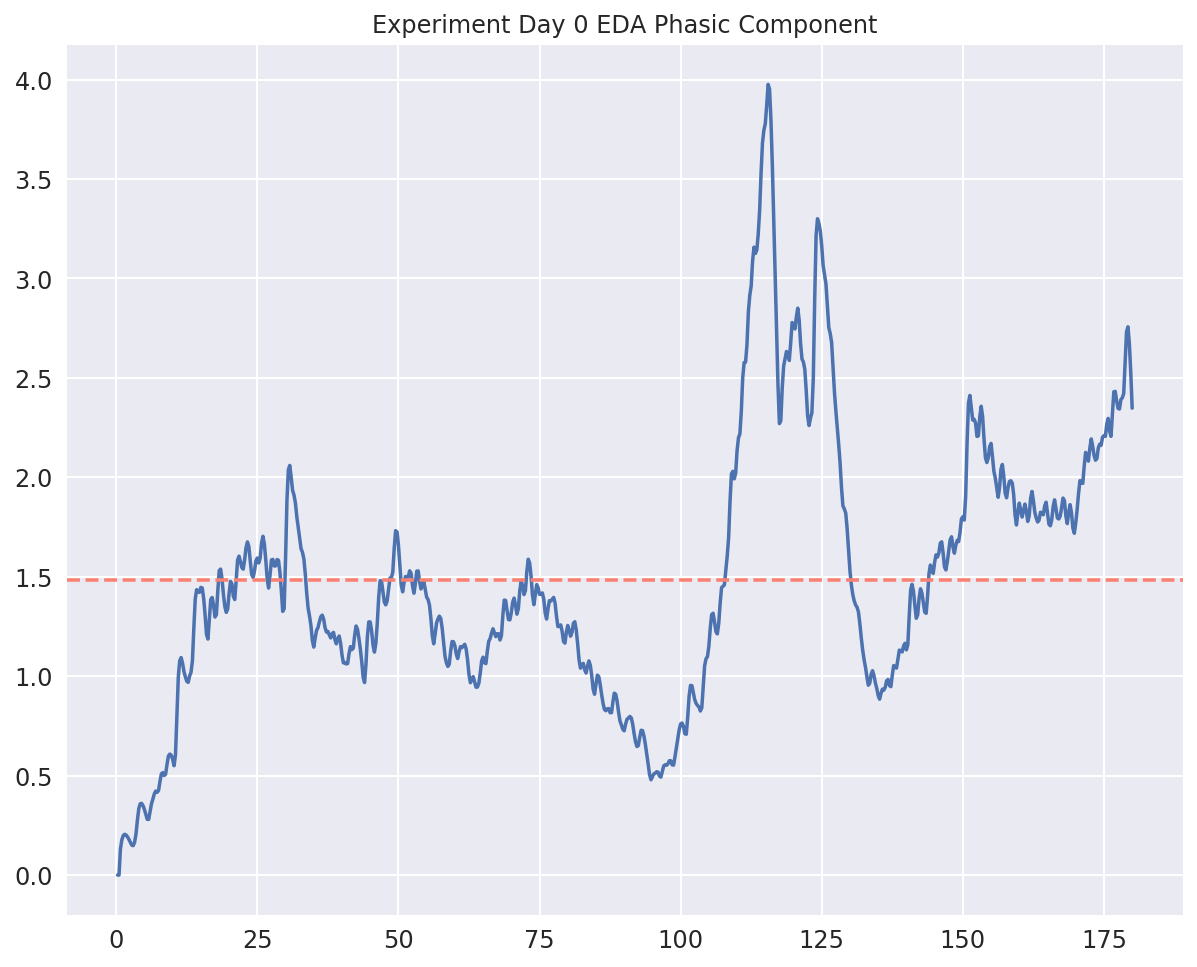

In [43]:
pl.hold(True)
# pl.plot(tm, yn)
pl.plot(tm0_3, r0_3)
# pl.plot(tm, p)
# pl.plot(tm, t)
p_mean0_3 = np.mean(r0_3)
plt.axhline(y =p_mean0_3,color = 'salmon',linestyle='--')
pl.title('Experiment Day 0 EDA Phasic Component')
pl.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


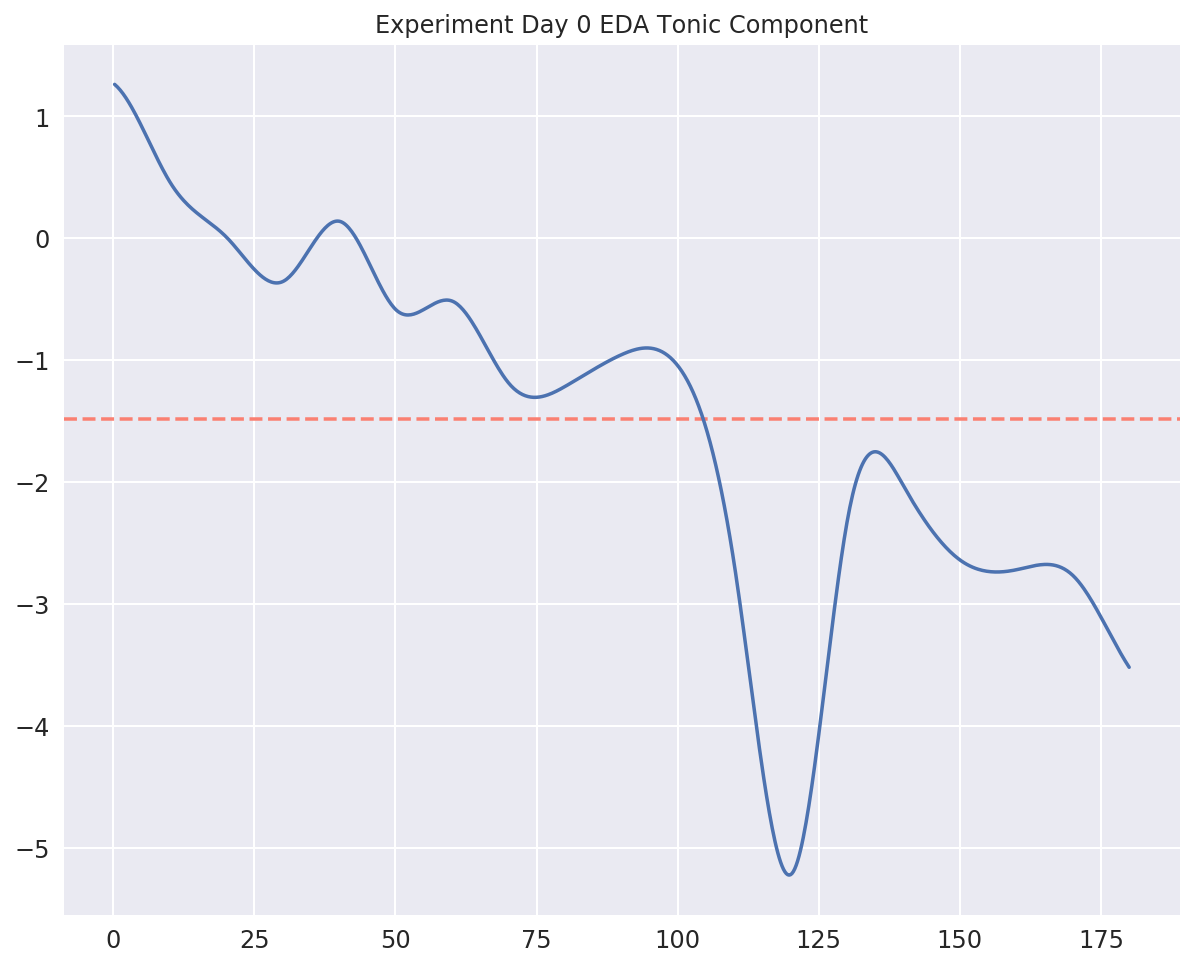

In [44]:
pl.hold(True)
t_mean0_3 = np.mean(t0_3)
plt.axhline(y = t_mean0_3,color = 'salmon',linestyle='--')
# pl.plot(tm, yn)
# pl.plot(tm, r)
# pl.plot(tm, p)
pl.plot(tm0_3, t0_3)
pl.title('Experiment Day 0 EDA Tonic Component')
pl.show()

### Day 1 Visuals

In [45]:
y1 = np.asarray(fl_exp1.eda)
y1[:10]

array([0.354865, 0.356146, 0.353584, 0.352302, 0.353584, 0.352302,
       0.352302, 0.351021, 0.351021, 0.352302])

In [46]:
yn1 = (y1 - y1.mean()) / y1.std()
Fs = 4.
[r1, p1, t1, l1, d1, e1, obj1] = cvxEDA.cvxEDA(yn1, 1./Fs)

# pl.rcParams['figure.figsize'] = (30,20)
tm1 = pl.arange(1., len(y1)+1.) / Fs


     pcost       dcost       gap    pres   dres
 0: -8.2592e+02 -7.8734e+02  6e+03  7e+01  9e-01
 1: -8.5020e+02 -1.9960e+03  2e+03  2e+01  2e-01
 2: -8.8247e+02 -1.4932e+03  7e+02  6e+00  8e-02
 3: -9.0155e+02 -1.1958e+03  3e+02  2e+00  3e-02
 4: -9.1418e+02 -1.1221e+03  2e+02  1e+00  1e-02
 5: -9.2560e+02 -1.0424e+03  1e+02  5e-01  6e-03
 6: -9.3454e+02 -1.0122e+03  8e+01  3e-01  3e-03
 7: -9.4149e+02 -9.7753e+02  4e+01  9e-02  1e-03
 8: -9.4601e+02 -9.6167e+02  2e+01  3e-02  4e-04
 9: -9.4864e+02 -9.5430e+02  6e+00  1e-02  1e-04
10: -9.4979e+02 -9.5171e+02  2e+00  1e-03  2e-05
11: -9.5045e+02 -9.5076e+02  3e-01  2e-04  2e-06
12: -9.5056e+02 -9.5061e+02  5e-02  3e-05  3e-07
13: -9.5058e+02 -9.5059e+02  5e-03  2e-06  3e-08
14: -9.5059e+02 -9.5059e+02  3e-04  1e-07  2e-09
15: -9.5059e+02 -9.5059e+02  1e-05  5e-09  6e-11
16: -9.5059e+02 -9.5059e+02  3e-07  6e-11  7e-13
Optimal solution found.


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


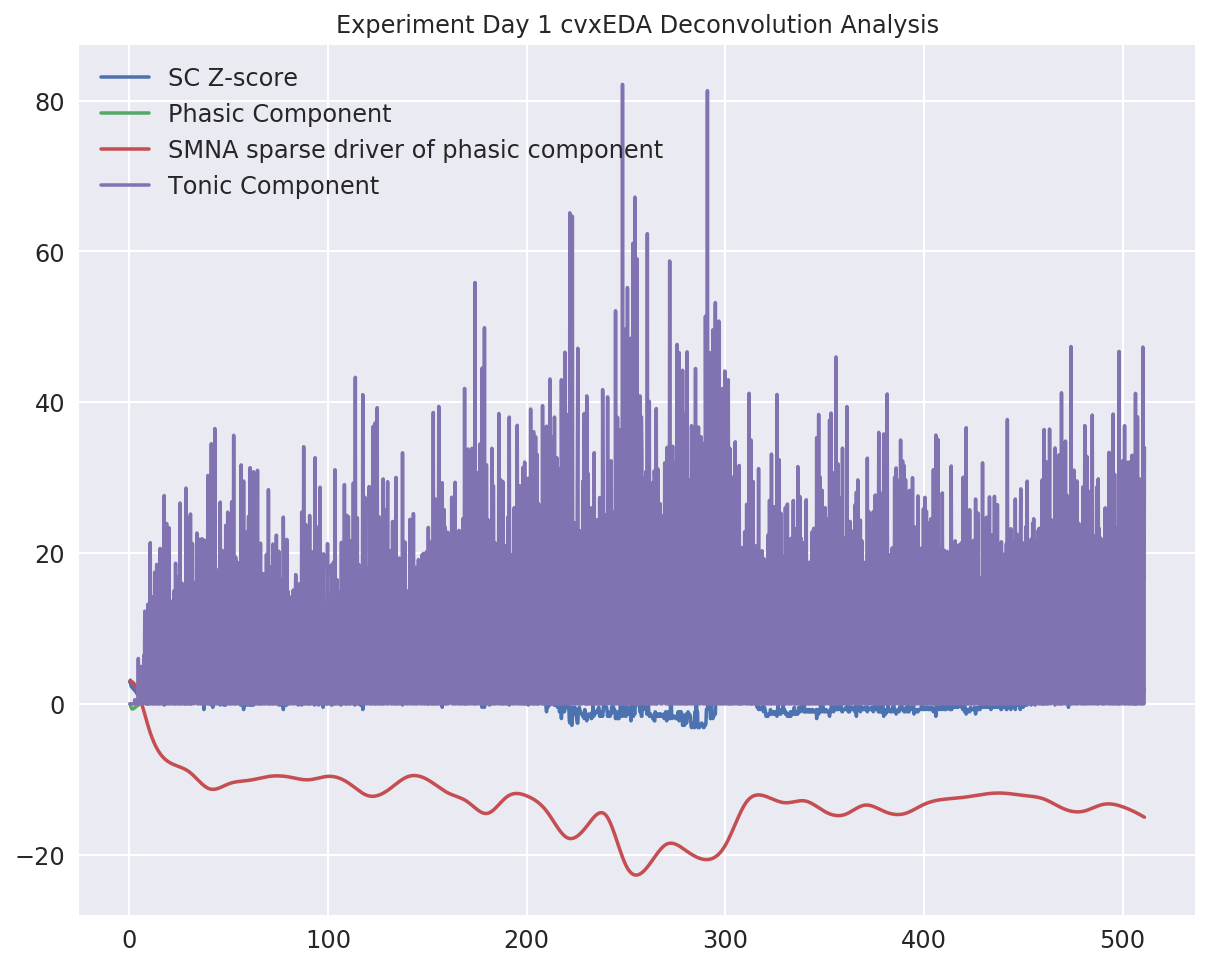

In [47]:
pl.hold(True)
pl.plot(tm1, yn1)
pl.plot(tm1, r1)
pl.plot(tm1, t1)
pl.plot(tm1, p1)

pl.title('Experiment Day 1 cvxEDA Deconvolution Analysis')
pl.legend(['SC Z-score','Phasic Component','SMNA sparse driver of phasic component',
           'Tonic Component'])

pl.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


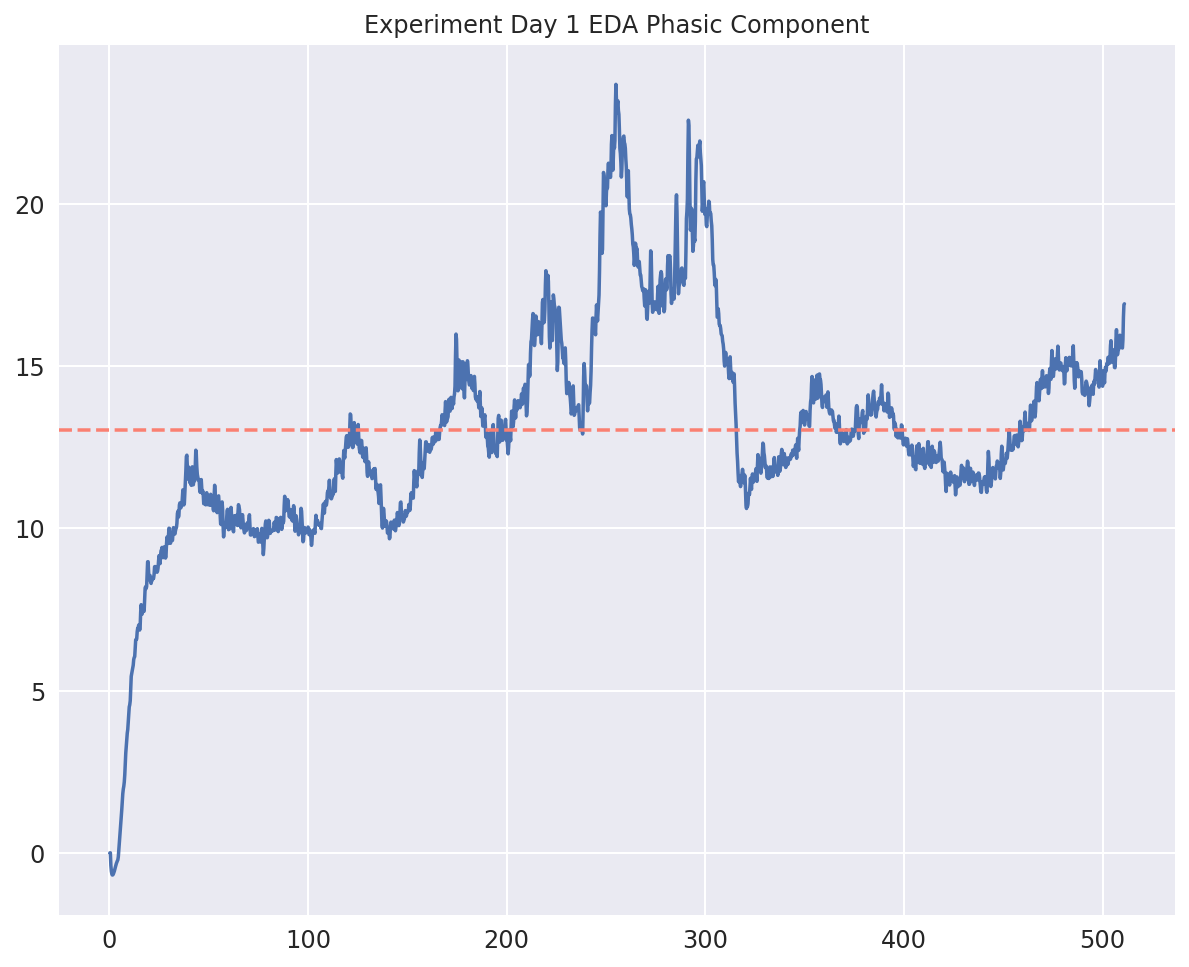

In [48]:
pl.hold(True)
# pl.plot(tm, yn)
pl.plot(tm1, r1)
# pl.plot(tm, p)
# pl.plot(tm, t)
p_mean1 = np.mean(r1)
plt.axhline(y =p_mean1,color = 'salmon',linestyle='--')
pl.title('Experiment Day 1 EDA Phasic Component')
pl.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


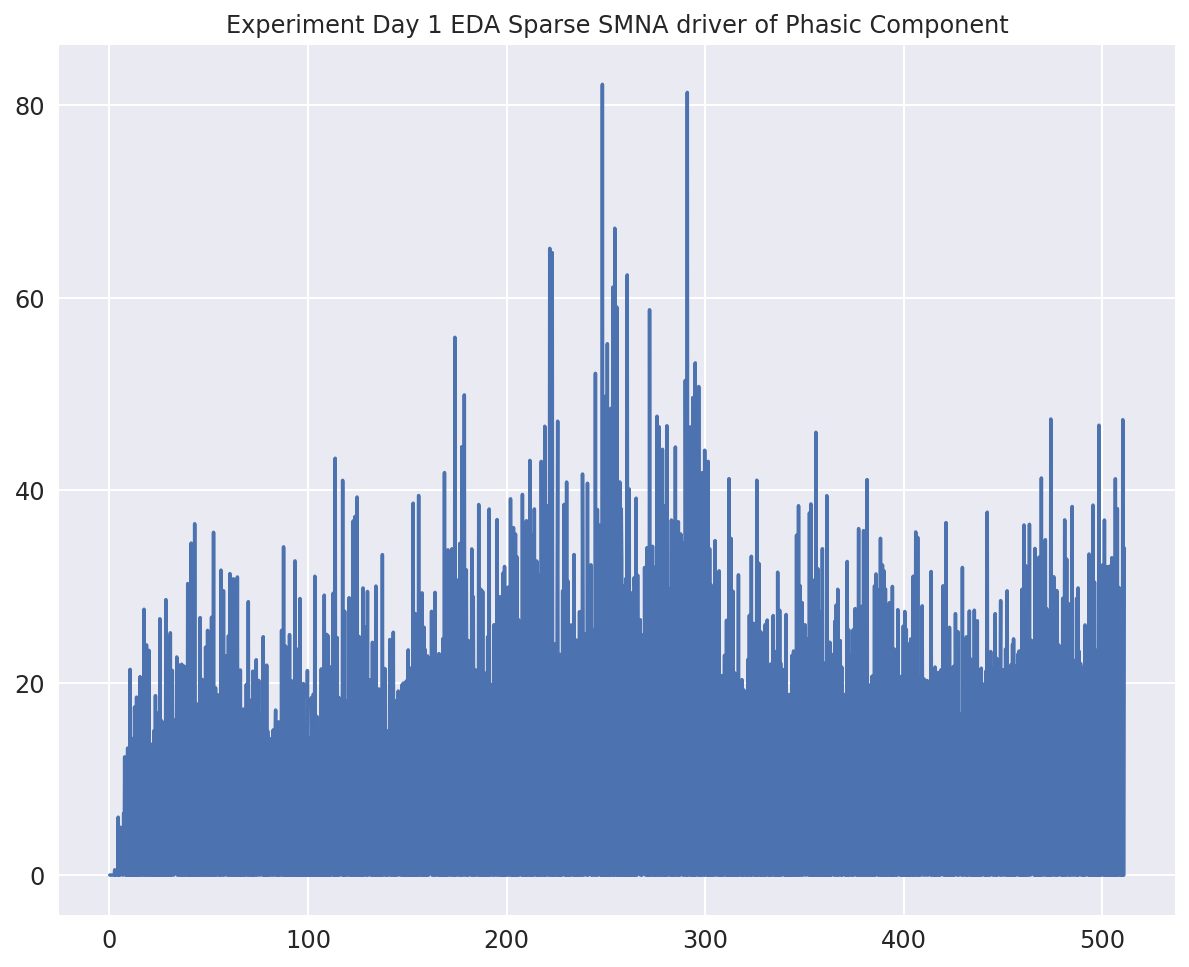

In [49]:
pl.hold(True)
# pl.plot(tm, yn)
# pl.plot(tm, r)
pl.plot(tm1, p1)
# pl.plot(tm, t)
pl.title('Experiment Day 1 EDA Sparse SMNA driver of Phasic Component')
pl.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


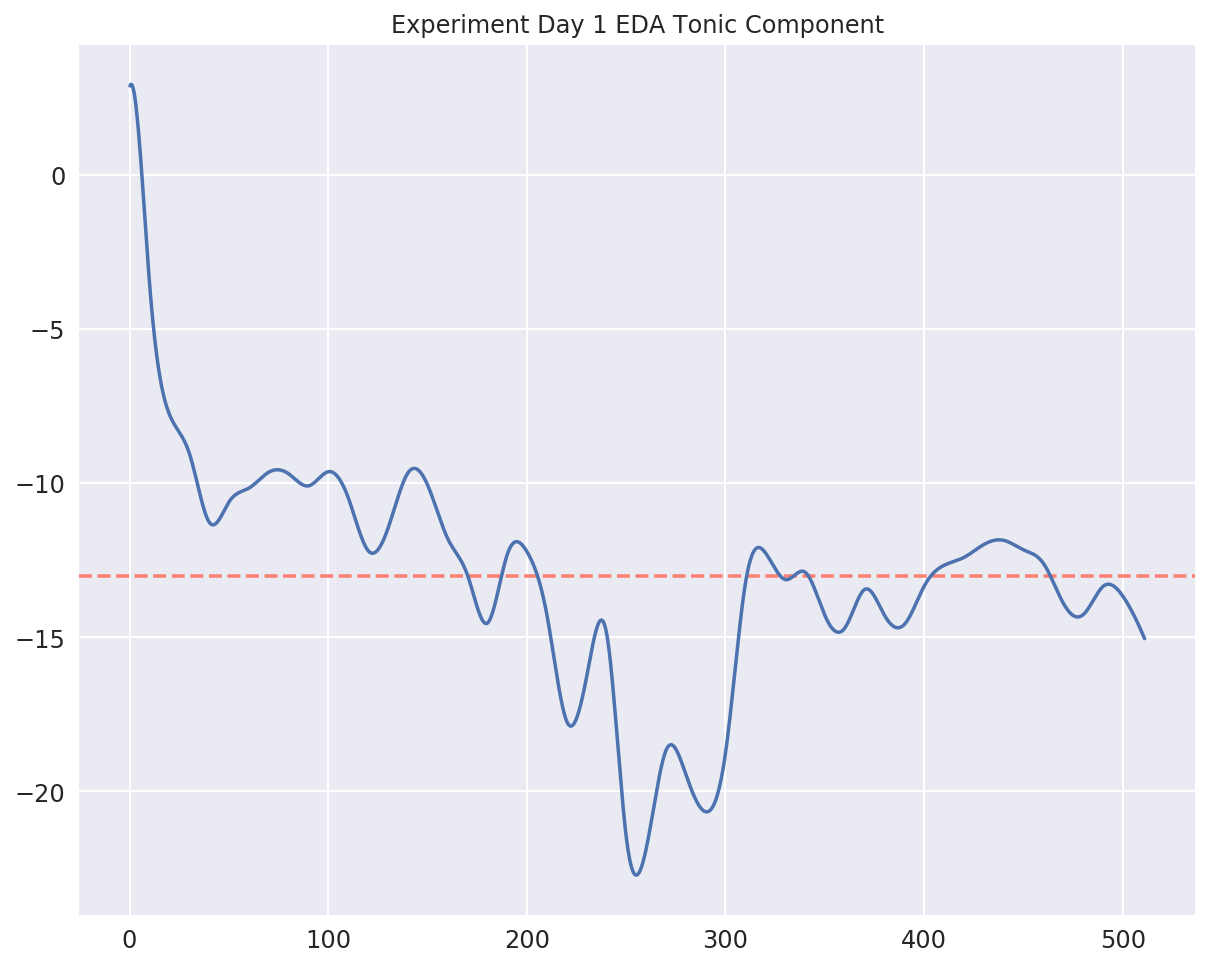

In [50]:
pl.hold(True)
t_mean1 = np.mean(t1)
plt.axhline(y = t_mean1,color = 'salmon',linestyle='--')
# pl.plot(tm, yn)
# pl.plot(tm, r)
# pl.plot(tm, p)
pl.plot(tm1, t1)
pl.title('Experiment Day 1 EDA Tonic Component')
pl.show()

#### Only the 3 min experiment period data

In [51]:
y1_3 = np.asarray(fl_day1.eda)
y1_3[:10]

array([0.335648, 0.336929, 0.336929, 0.335648, 0.336929, 0.336929,
       0.33821 , 0.335648, 0.336929, 0.33821 ])

In [52]:
yn1_3 = (y1_3 - y1_3.mean()) / y1_3.std()
Fs = 4.
[r1_3, p1_3, t1_3, l1_3, d1_3, e1_3, obj1_3] = cvxEDA.cvxEDA(yn1_3, 1./Fs)

# pl.rcParams['figure.figsize'] = (30,20)
tm1_3 = pl.arange(1., len(y1_3)+1.) / Fs


     pcost       dcost       gap    pres   dres
 0: -3.0557e+02 -3.0040e+02  1e+03  3e+01  7e-01
 1: -3.0904e+02 -4.1041e+02  1e+02  4e+00  8e-02
 2: -3.1522e+02 -3.7128e+02  6e+01  1e+00  3e-02
 3: -3.1996e+02 -3.4778e+02  3e+01  5e-01  1e-02
 4: -3.2392e+02 -3.3670e+02  1e+01  2e-01  5e-03
 5: -3.2757e+02 -3.3547e+02  8e+00  1e-01  2e-03
 6: -3.2945e+02 -3.3568e+02  6e+00  6e-02  1e-03
 7: -3.3053e+02 -3.3485e+02  4e+00  3e-02  7e-04
 8: -3.3116e+02 -3.3397e+02  3e+00  1e-02  3e-04
 9: -3.3147e+02 -3.3312e+02  2e+00  6e-03  1e-04
10: -3.3185e+02 -3.3215e+02  3e-01  9e-04  2e-05
11: -3.3195e+02 -3.3198e+02  3e-02  7e-05  1e-06
12: -3.3196e+02 -3.3196e+02  2e-03  4e-06  9e-08
13: -3.3196e+02 -3.3196e+02  8e-05  1e-07  2e-09
14: -3.3196e+02 -3.3196e+02  2e-06  2e-09  3e-11
15: -3.3196e+02 -3.3196e+02  1e-07  2e-11  4e-13
Optimal solution found.


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


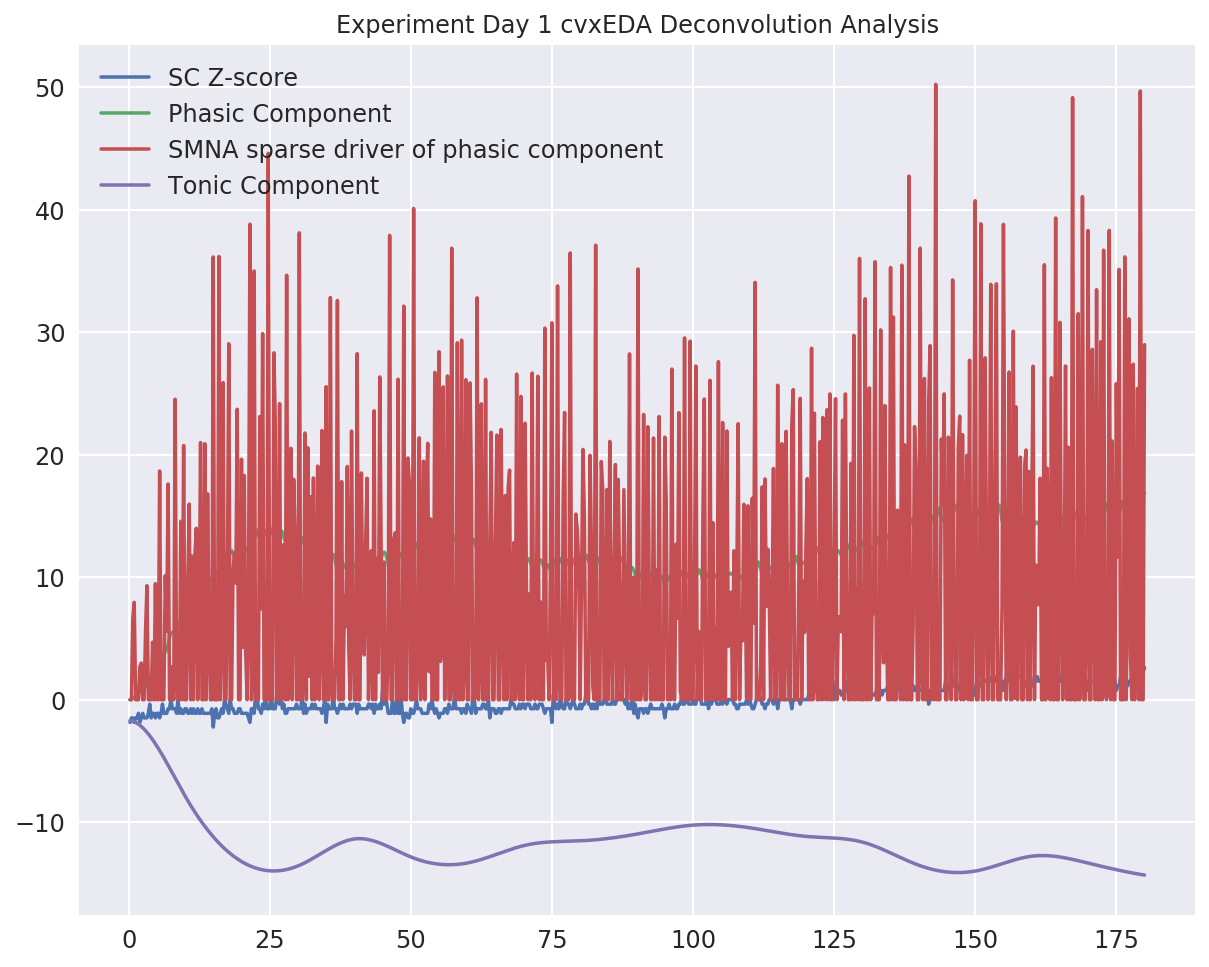

In [53]:
pl.hold(True)
pl.plot(tm1_3, yn1_3)
pl.plot(tm1_3, r1_3)
pl.plot(tm1_3, p1_3)
pl.plot(tm1_3, t1_3)
pl.title('Experiment Day 1 cvxEDA Deconvolution Analysis')
pl.legend(['SC Z-score','Phasic Component','SMNA sparse driver of phasic component',
           'Tonic Component'])

pl.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


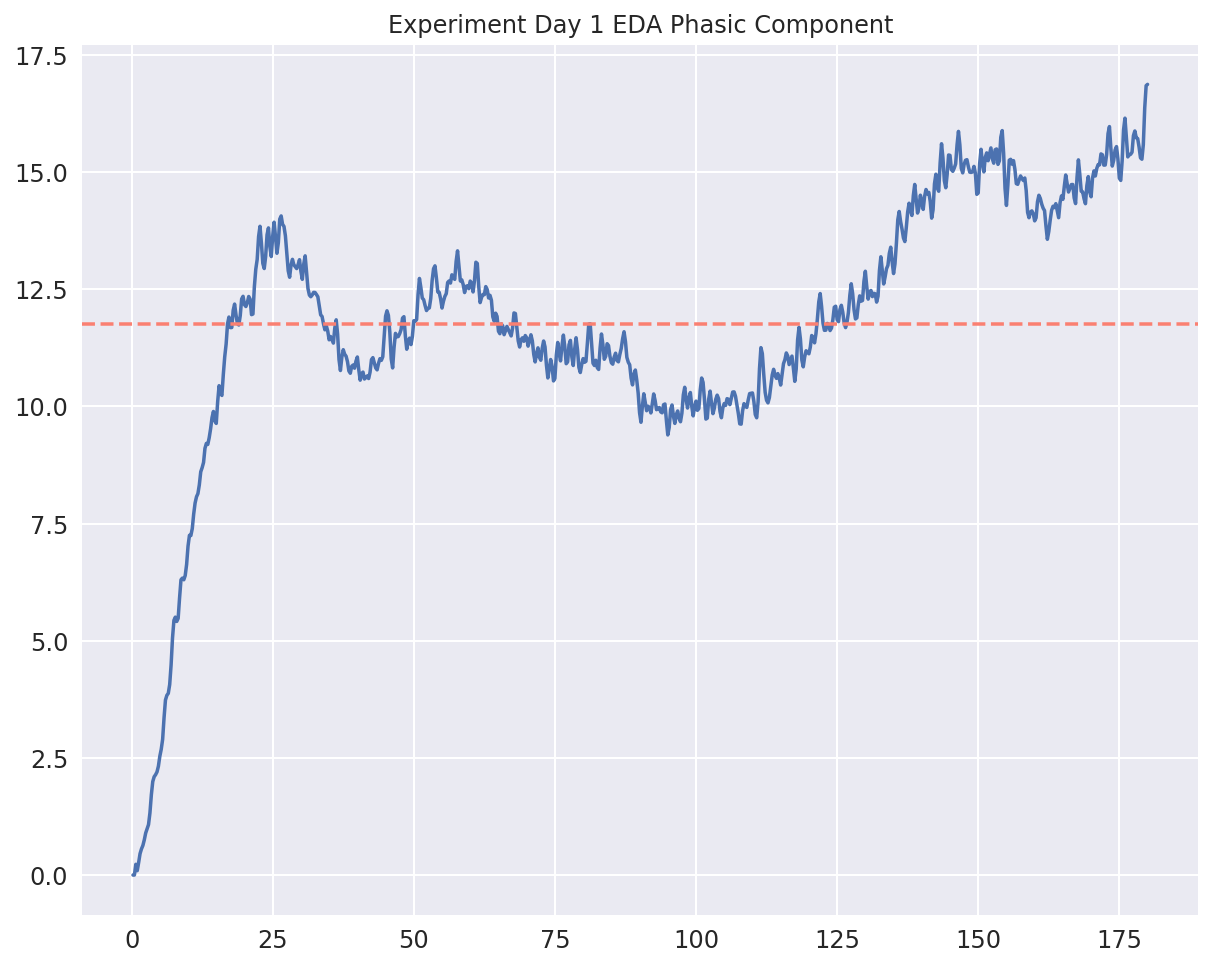

In [54]:
pl.hold(True)
# pl.plot(tm, yn)
pl.plot(tm1_3, r1_3)
# pl.plot(tm, p)
# pl.plot(tm, t)
p_mean1_3 = np.mean(r1_3)
plt.axhline(y =p_mean1_3,color = 'salmon',linestyle='--')
pl.title('Experiment Day 1 EDA Phasic Component')
pl.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


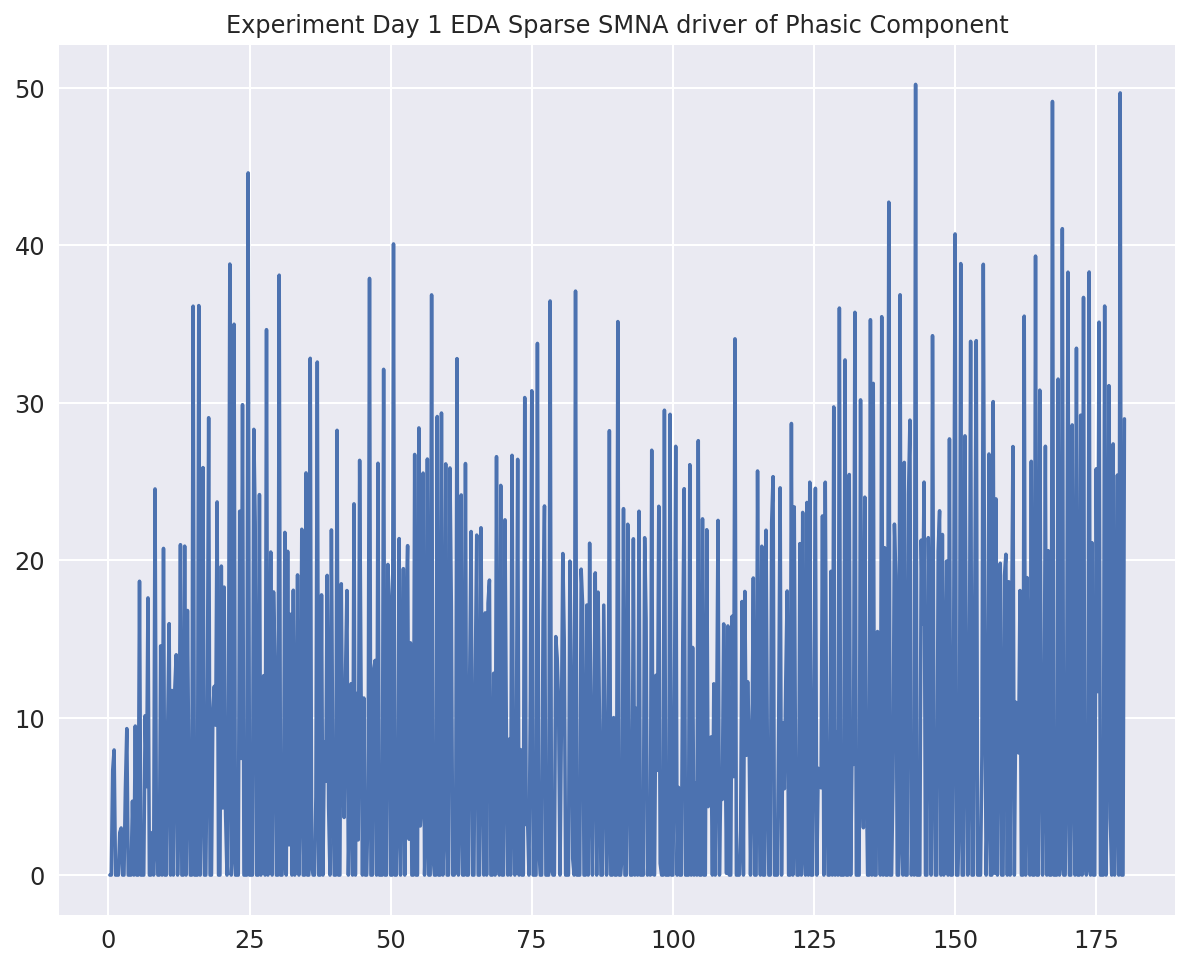

In [55]:
pl.hold(True)
# pl.plot(tm, yn)
# pl.plot(tm, r)
pl.plot(tm1_3, p1_3)
# pl.plot(tm, t)
pl.title('Experiment Day 1 EDA Sparse SMNA driver of Phasic Component')
pl.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


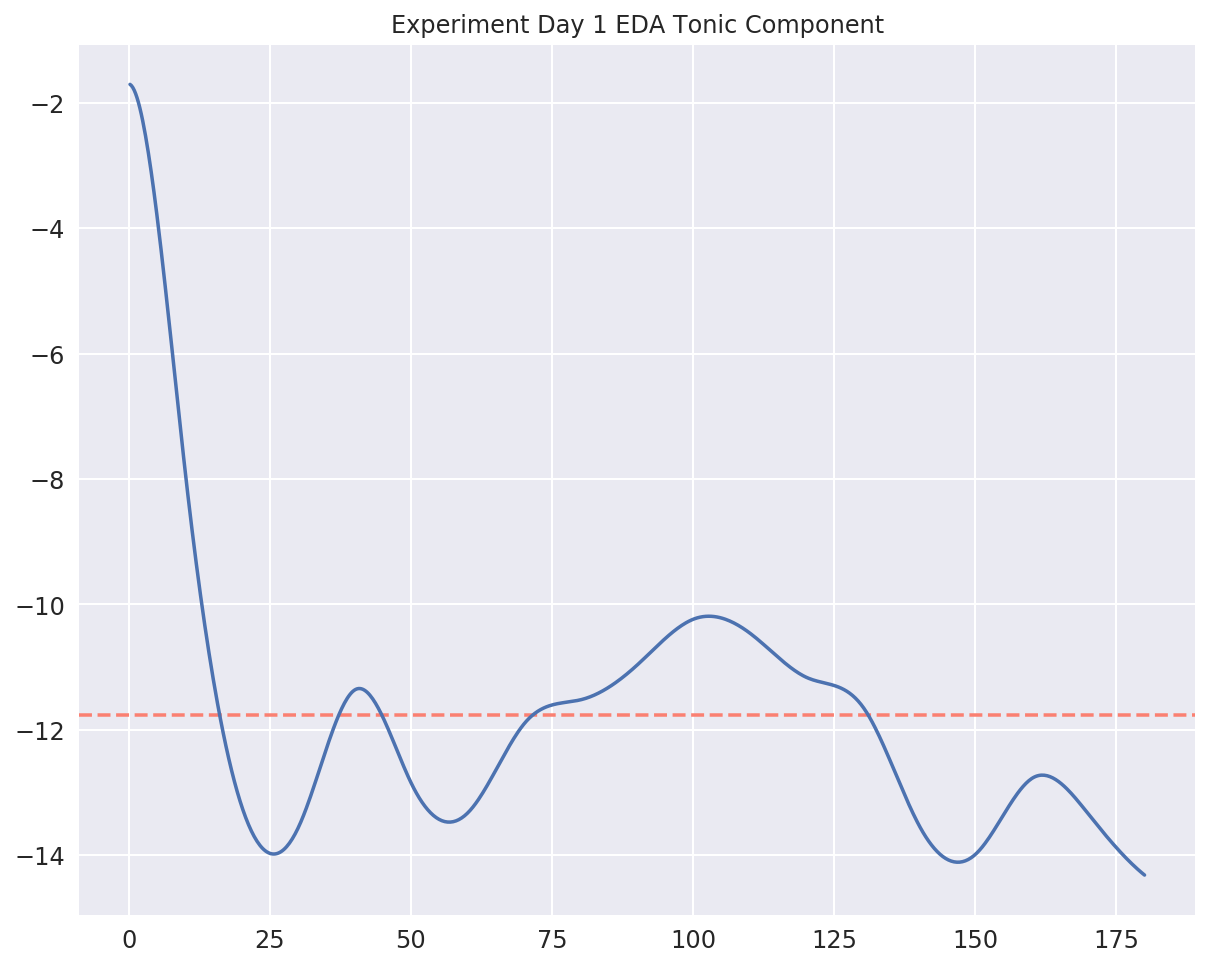

In [56]:
pl.hold(True)
t_mean1_3 = np.mean(t1_3)
plt.axhline(y = t_mean1_3,color = 'salmon',linestyle='--')
# pl.plot(tm, yn)
# pl.plot(tm, r)
# pl.plot(tm, p)
pl.plot(tm1_3, t1_3)
pl.title('Experiment Day 1 EDA Tonic Component')
pl.show()

### Day 2

In [57]:
y2 = np.asarray(fl_exp2.eda)
y2[:10]

array([0.474007, 0.475288, 0.472726, 0.472726, 0.472726, 0.471445,
       0.470164, 0.470164, 0.470164, 0.468883])

In [58]:
yn2 = (y2 - y2.mean()) / y2.std()
Fs = 4.
[r2, p2, t2, l2, d2, e2, obj2] = cvxEDA.cvxEDA(yn2, 1./Fs)

# pl.rcParams['figure.figsize'] = (30,20)
tm2 = pl.arange(1., len(y2)+1.) / Fs


     pcost       dcost       gap    pres   dres
 0: -7.9709e+02 -7.9311e+02  3e+03  5e+01  4e-01
 1: -7.9729e+02 -1.1396e+03  4e+02  7e+00  6e-02
 2: -7.9939e+02 -9.0831e+02  1e+02  2e+00  1e-02
 3: -8.0056e+02 -8.4486e+02  4e+01  6e-01  5e-03
 4: -8.0136e+02 -8.1852e+02  2e+01  2e-01  1e-03
 5: -8.0148e+02 -8.1086e+02  9e+00  7e-02  6e-04
 6: -8.0207e+02 -8.0531e+02  3e+00  1e-02  1e-04
 7: -8.0328e+02 -8.0419e+02  9e-01  3e-03  3e-05
 8: -8.0368e+02 -8.0402e+02  3e-01  9e-04  8e-06
 9: -8.0387e+02 -8.0395e+02  8e-02  5e-05  4e-07
10: -8.0391e+02 -8.0393e+02  2e-02  1e-05  9e-08
11: -8.0392e+02 -8.0392e+02  6e-03  2e-06  2e-08
12: -8.0392e+02 -8.0392e+02  1e-03  3e-07  2e-09
13: -8.0392e+02 -8.0392e+02  2e-04  4e-08  3e-10
14: -8.0392e+02 -8.0392e+02  3e-05  4e-09  3e-11
15: -8.0392e+02 -8.0392e+02  1e-06  1e-10  1e-12
16: -8.0392e+02 -8.0392e+02  4e-08  5e-12  4e-14
Optimal solution found.


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


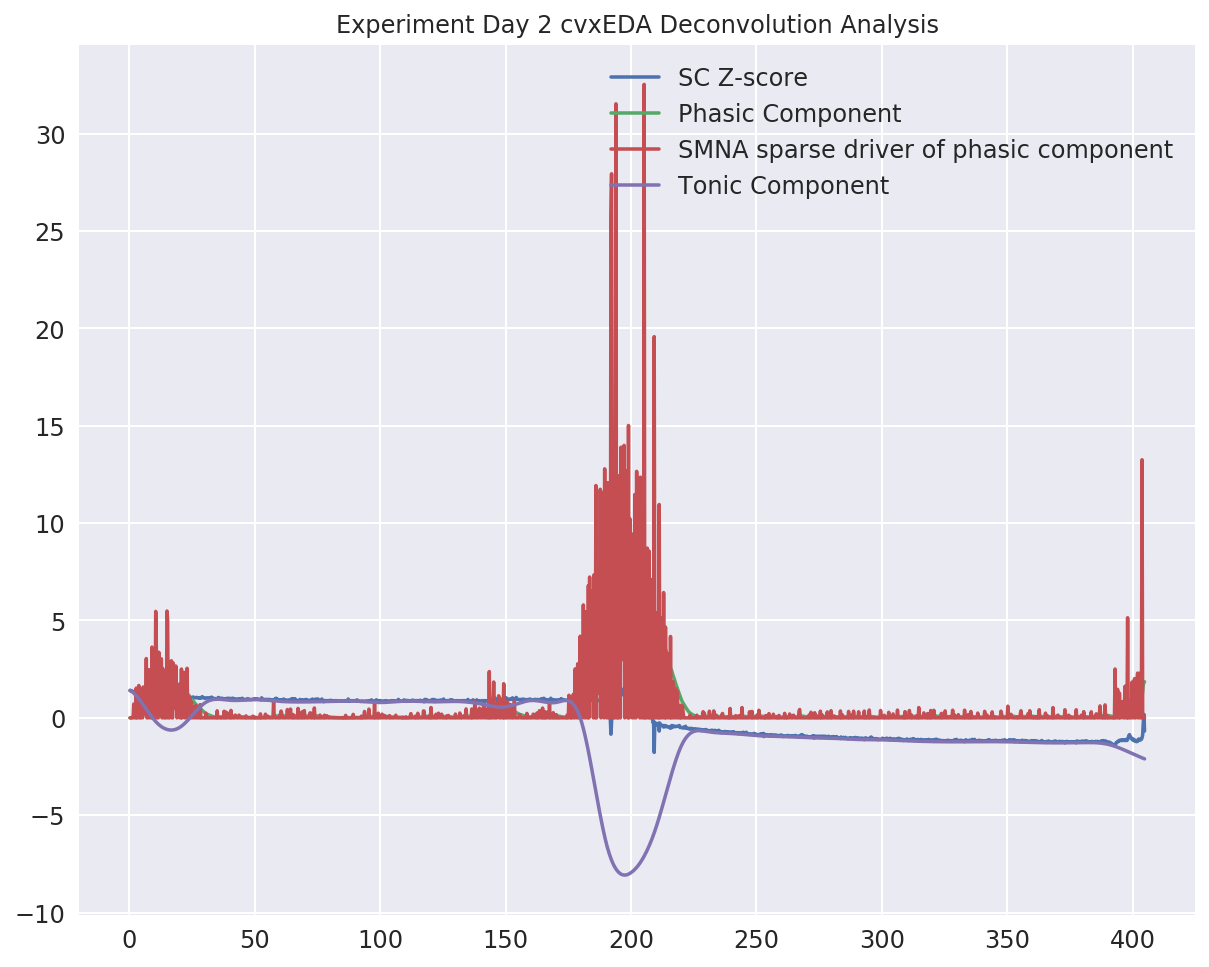

In [59]:
pl.hold(True)
pl.plot(tm2, yn2)
pl.plot(tm2, r2)
pl.plot(tm2, p2)
pl.plot(tm2, t2)
pl.title('Experiment Day 2 cvxEDA Deconvolution Analysis')
pl.legend(['SC Z-score','Phasic Component','SMNA sparse driver of phasic component',
           'Tonic Component'])

pl.show()

#### Only consider the 3 minutes experiment period

In [60]:
y2_3 = np.asarray(fl_day2.eda)
y2_3[:10]

array([0.350007, 0.350007, 0.350007, 0.348726, 0.350007, 0.348726,
       0.348726, 0.350007, 0.348726, 0.348726])

In [61]:
yn2_3 = (y2_3 - y2_3.mean()) / y2_3.std()
Fs = 4.
[r2_3, p2_3, t2_3, l2_3, d2_3, e2_3, obj2_3] = cvxEDA.cvxEDA(yn2_3, 1./Fs)

# pl.rcParams['figure.figsize'] = (30,20)
tm2_3 = pl.arange(1., len(y2_3)+1.) / Fs


     pcost       dcost       gap    pres   dres
 0: -3.2671e+02 -3.1856e+02  2e+03  4e+01  9e-01
 1: -3.3259e+02 -7.7144e+02  6e+02  1e+01  3e-01
 2: -3.4422e+02 -5.8094e+02  3e+02  4e+00  8e-02
 3: -3.4612e+02 -4.0577e+02  6e+01  8e-01  2e-02
 4: -3.4723e+02 -3.7601e+02  3e+01  3e-01  7e-03
 5: -3.4794e+02 -3.5668e+02  9e+00  8e-02  2e-03
 6: -3.4860e+02 -3.5165e+02  3e+00  2e-02  5e-04
 7: -3.4915e+02 -3.5024e+02  1e+00  5e-03  1e-04
 8: -3.4954e+02 -3.4973e+02  2e-01  6e-04  1e-05
 9: -3.4962e+02 -3.4966e+02  4e-02  1e-04  2e-06
10: -3.4964e+02 -3.4964e+02  6e-03  1e-05  2e-07
11: -3.4964e+02 -3.4964e+02  4e-04  6e-07  1e-08
12: -3.4964e+02 -3.4964e+02  5e-05  7e-08  1e-09
13: -3.4964e+02 -3.4964e+02  2e-06  1e-09  3e-11
14: -3.4964e+02 -3.4964e+02  6e-08  1e-11  6e-13
Optimal solution found.


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


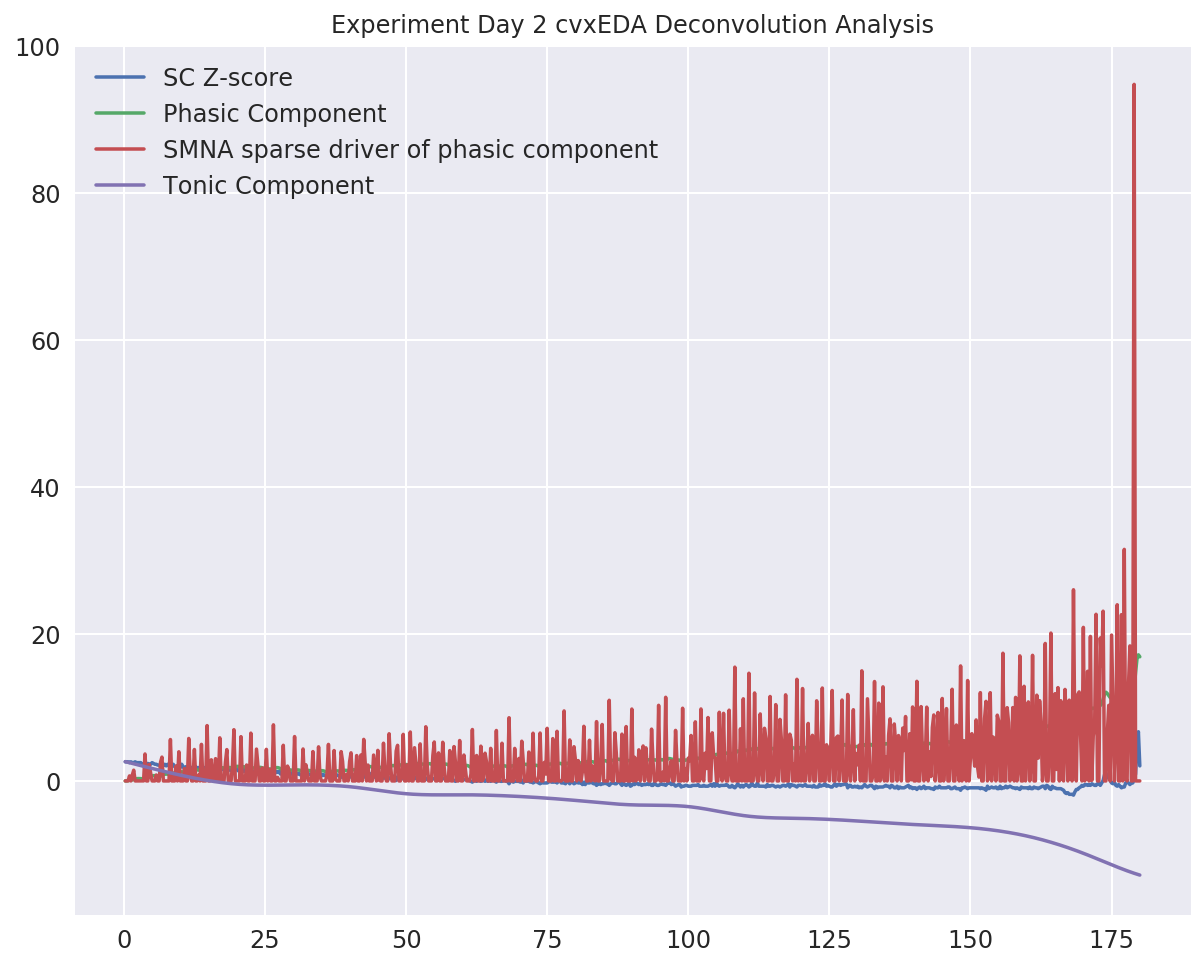

In [62]:
pl.hold(True)
pl.plot(tm2_3, yn2_3)
pl.plot(tm2_3, r2_3)
pl.plot(tm2_3, p2_3)
pl.plot(tm2_3, t2_3)
pl.title('Experiment Day 2 cvxEDA Deconvolution Analysis')
pl.legend(['SC Z-score','Phasic Component','SMNA sparse driver of phasic component',
           'Tonic Component'])

pl.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


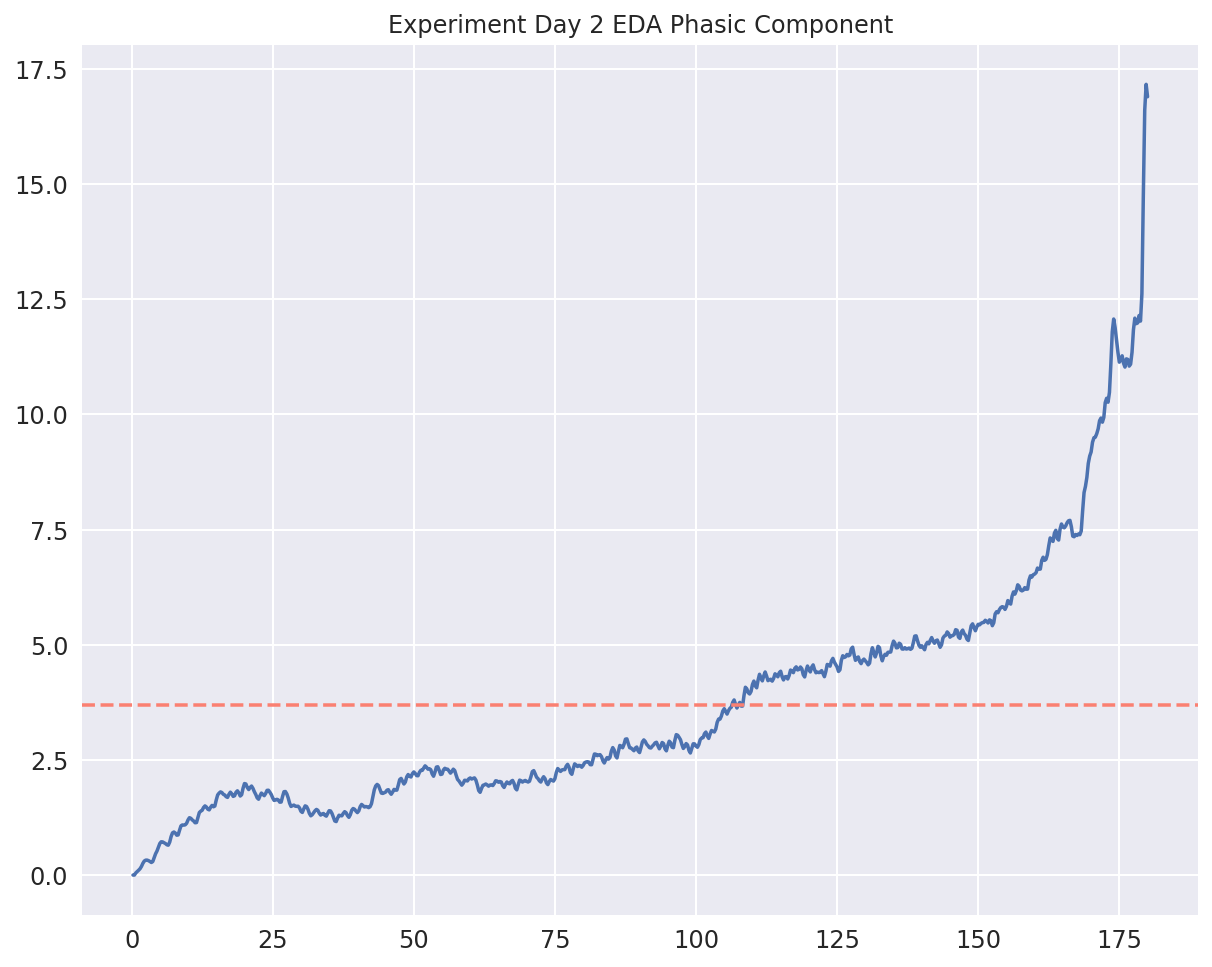

In [63]:
pl.hold(True)
# pl.plot(tm, yn)
pl.plot(tm2_3, r2_3)
# pl.plot(tm, p)
# pl.plot(tm, t)
p_mean2_3 = np.mean(r2_3)
plt.axhline(y =p_mean2_3,color = 'salmon',linestyle='--')
pl.title('Experiment Day 2 EDA Phasic Component')
pl.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


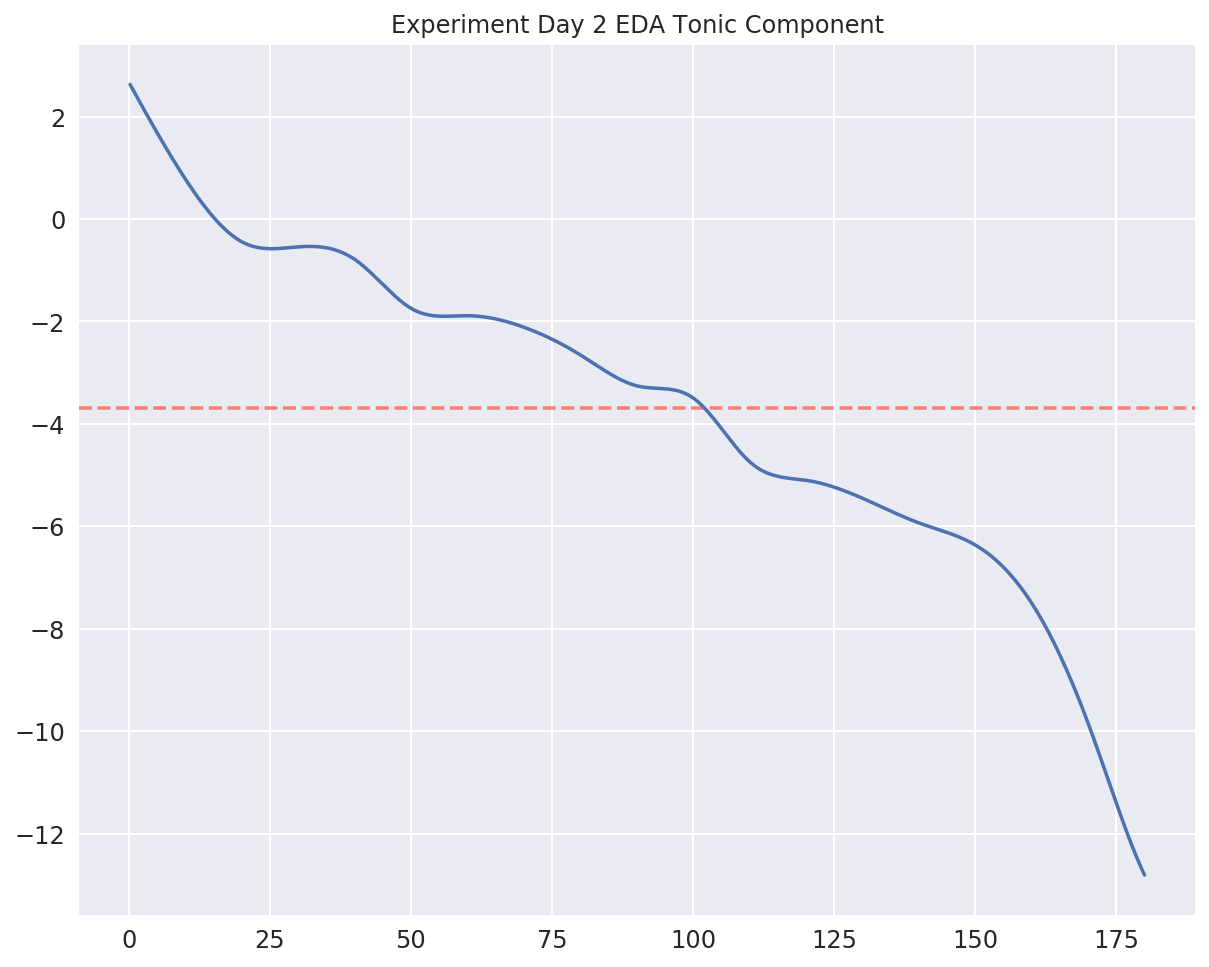

In [64]:
pl.hold(True)
t_mean2_3 = np.mean(t2_3)
plt.axhline(y = t_mean2_3,color = 'salmon',linestyle='--')
# pl.plot(tm, yn)
# pl.plot(tm, r)
# pl.plot(tm, p)
pl.plot(tm2_3, t2_3)
pl.title('Experiment Day 2 EDA Tonic Component')
pl.show()

### Plot 3 days results together

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


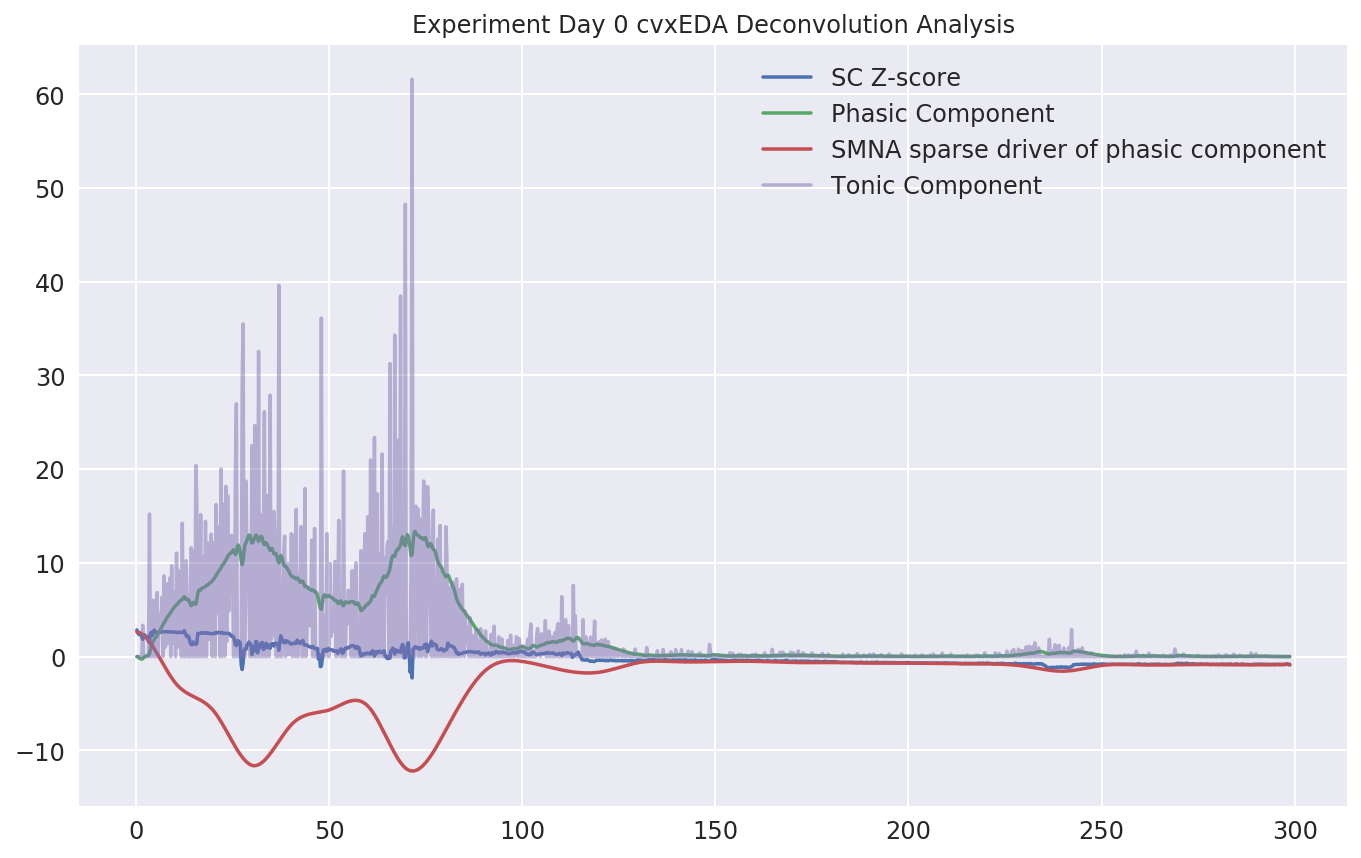

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  from ipykernel import kernelapp as app


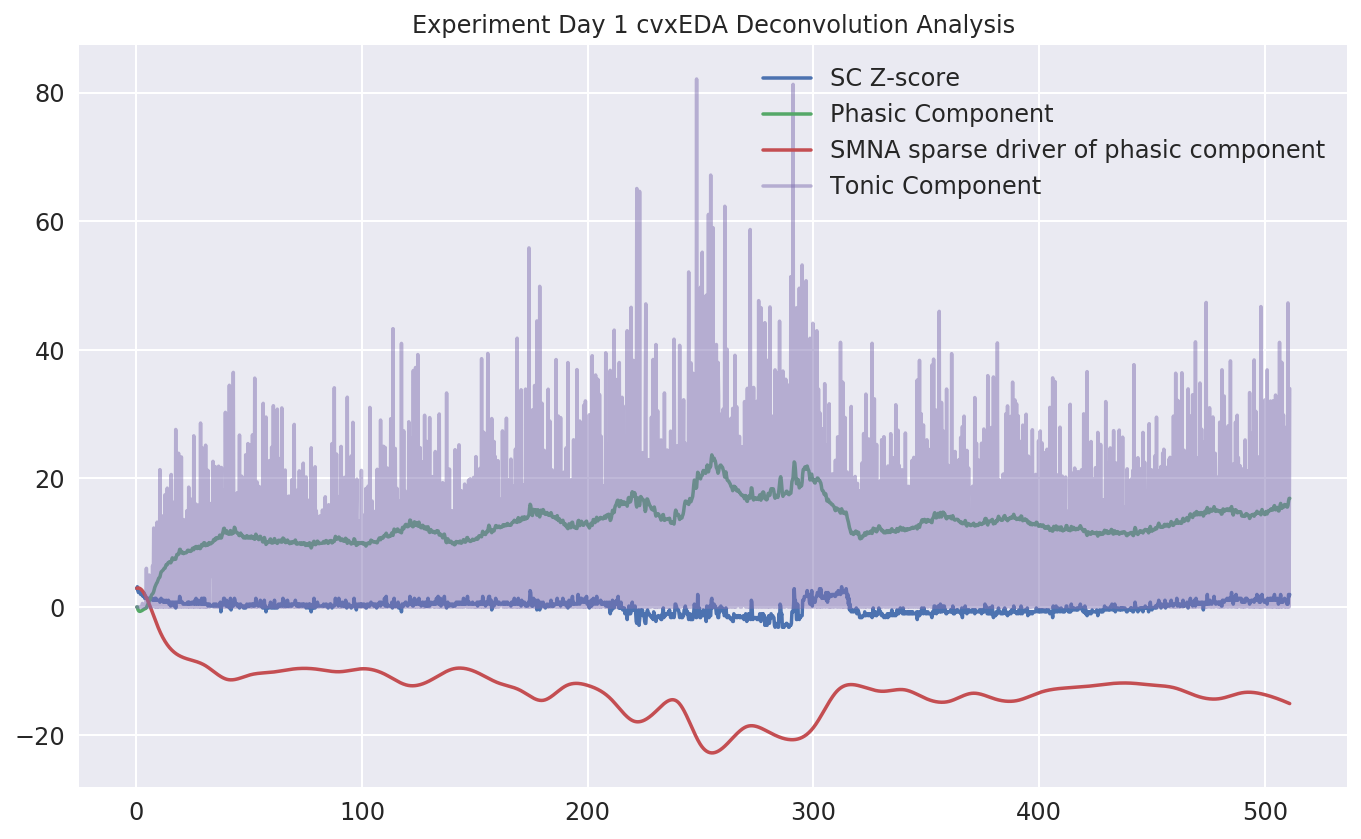

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


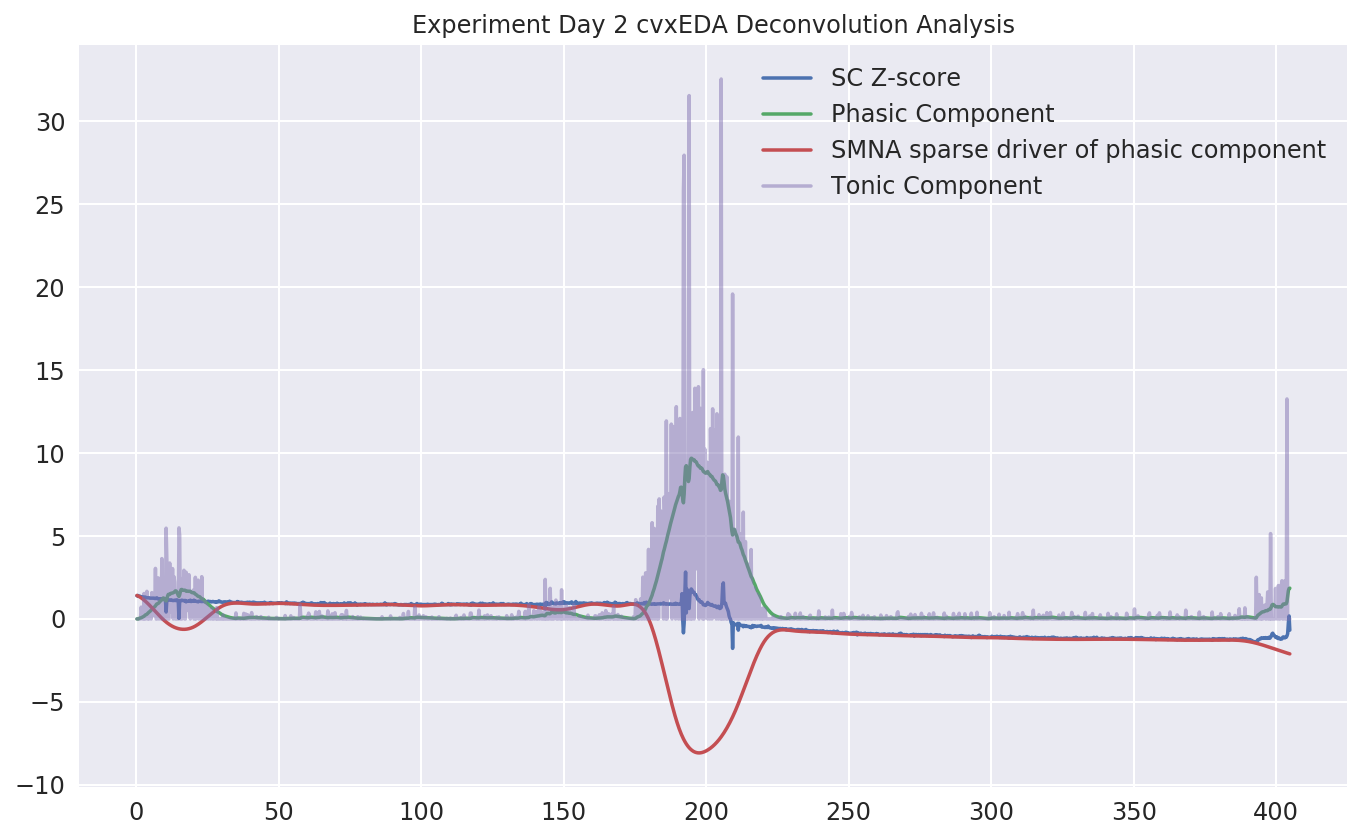

In [89]:
pl.figure(figsize=(25,7))
pl.subplot(121)
pl.hold(True)
pl.plot(tm0, yn0)
pl.plot(tm0, r0)
pl.plot(tm0, t0)
pl.plot(tm0, p0,alpha=0.5)
pl.title('Experiment Day 0 cvxEDA Deconvolution Analysis')
pl.legend(['SC Z-score','Phasic Component','SMNA sparse driver of phasic component',
           'Tonic Component'])
pl.show()

pl.figure(figsize=(25,15))
pl.subplot(222)
pl.hold(True)
pl.plot(tm1, yn1)
pl.plot(tm1, r1)
pl.plot(tm1, t1)
pl.plot(tm1, p1,alpha =0.5)

pl.title('Experiment Day 1 cvxEDA Deconvolution Analysis')
pl.legend(['SC Z-score','Phasic Component','SMNA sparse driver of phasic component',
           'Tonic Component'])
pl.show()

pl.figure(figsize=(25,15))
plt.subplot(223)
pl.hold(True)
pl.plot(tm2, yn2)
pl.plot(tm2, r2)
pl.plot(tm2, t2)
pl.plot(tm2, p2,alpha = 0.5)

pl.title('Experiment Day 2 cvxEDA Deconvolution Analysis')
pl.legend(['SC Z-score','Phasic Component','SMNA sparse driver of phasic component',
           'Tonic Component'])
plt.show()


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


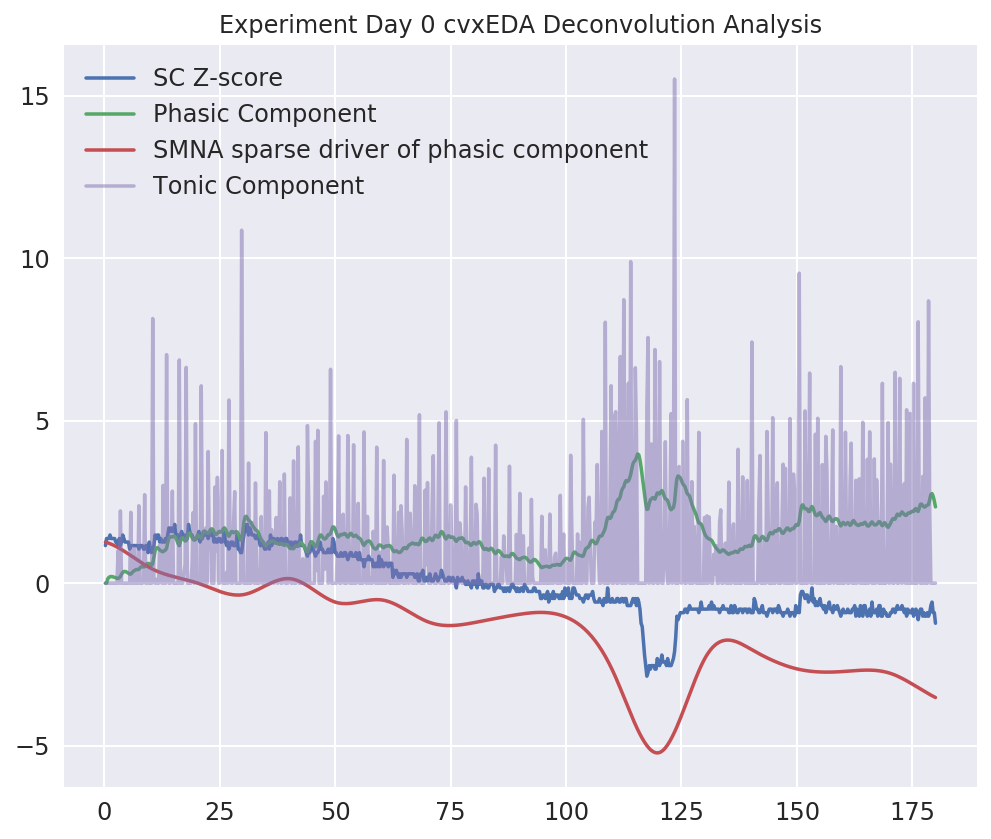

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  app.launch_new_instance()


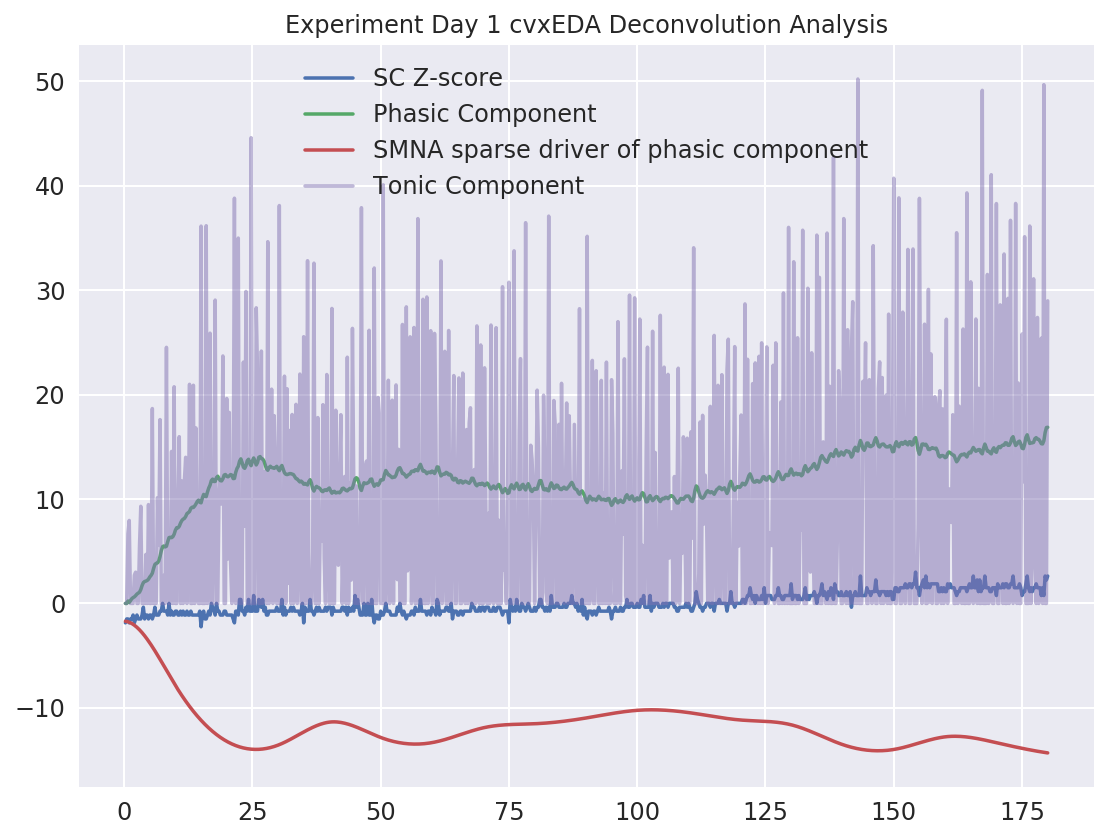

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


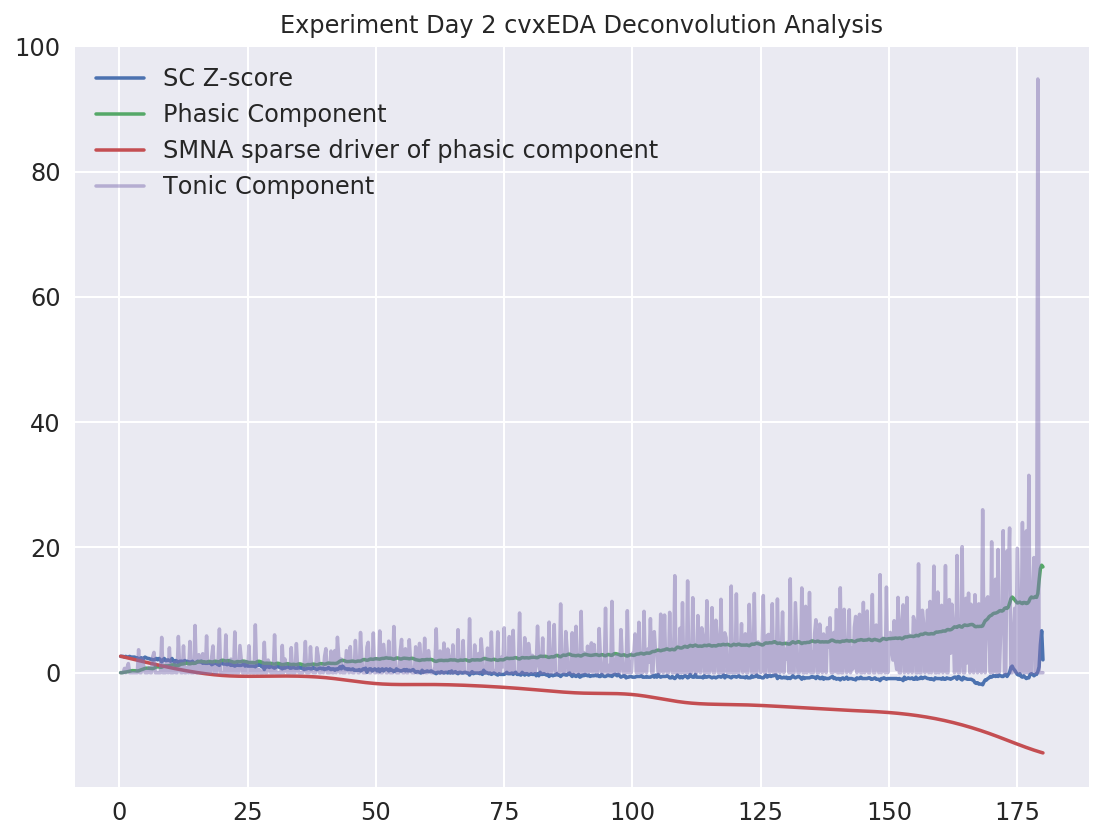

In [90]:
pl.figure(figsize=(18,15))
pl.subplot(221)
pl.hold(True)
pl.plot(tm0_3, yn0_3)
pl.plot(tm0_3, r0_3)
pl.plot(tm0_3, t0_3)
pl.plot(tm0_3, p0_3,alpha=0.5)

pl.title('Experiment Day 0 cvxEDA Deconvolution Analysis')
pl.legend(['SC Z-score','Phasic Component','SMNA sparse driver of phasic component',
           'Tonic Component'])
pl.show()

pl.figure(figsize=(20,15))
pl.subplot(222)
pl.hold(True)
pl.plot(tm1_3, yn1_3)
pl.plot(tm1_3, r1_3)
pl.plot(tm1_3, t1_3)
pl.plot(tm1_3, p1_3,alpha=0.5)

pl.title('Experiment Day 1 cvxEDA Deconvolution Analysis')
pl.legend(['SC Z-score','Phasic Component','SMNA sparse driver of phasic component',
           'Tonic Component'])
pl.show()

pl.figure(figsize=(20,15))
plt.subplot(223)
pl.hold(True)
pl.plot(tm2_3, yn2_3)
pl.plot(tm2_3, r2_3)
pl.plot(tm2_3, t2_3)
pl.plot(tm2_3, p2_3,alpha=0.5)

pl.title('Experiment Day 2 cvxEDA Deconvolution Analysis')
pl.legend(['SC Z-score','Phasic Component','SMNA sparse driver of phasic component',
           'Tonic Component'])
plt.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


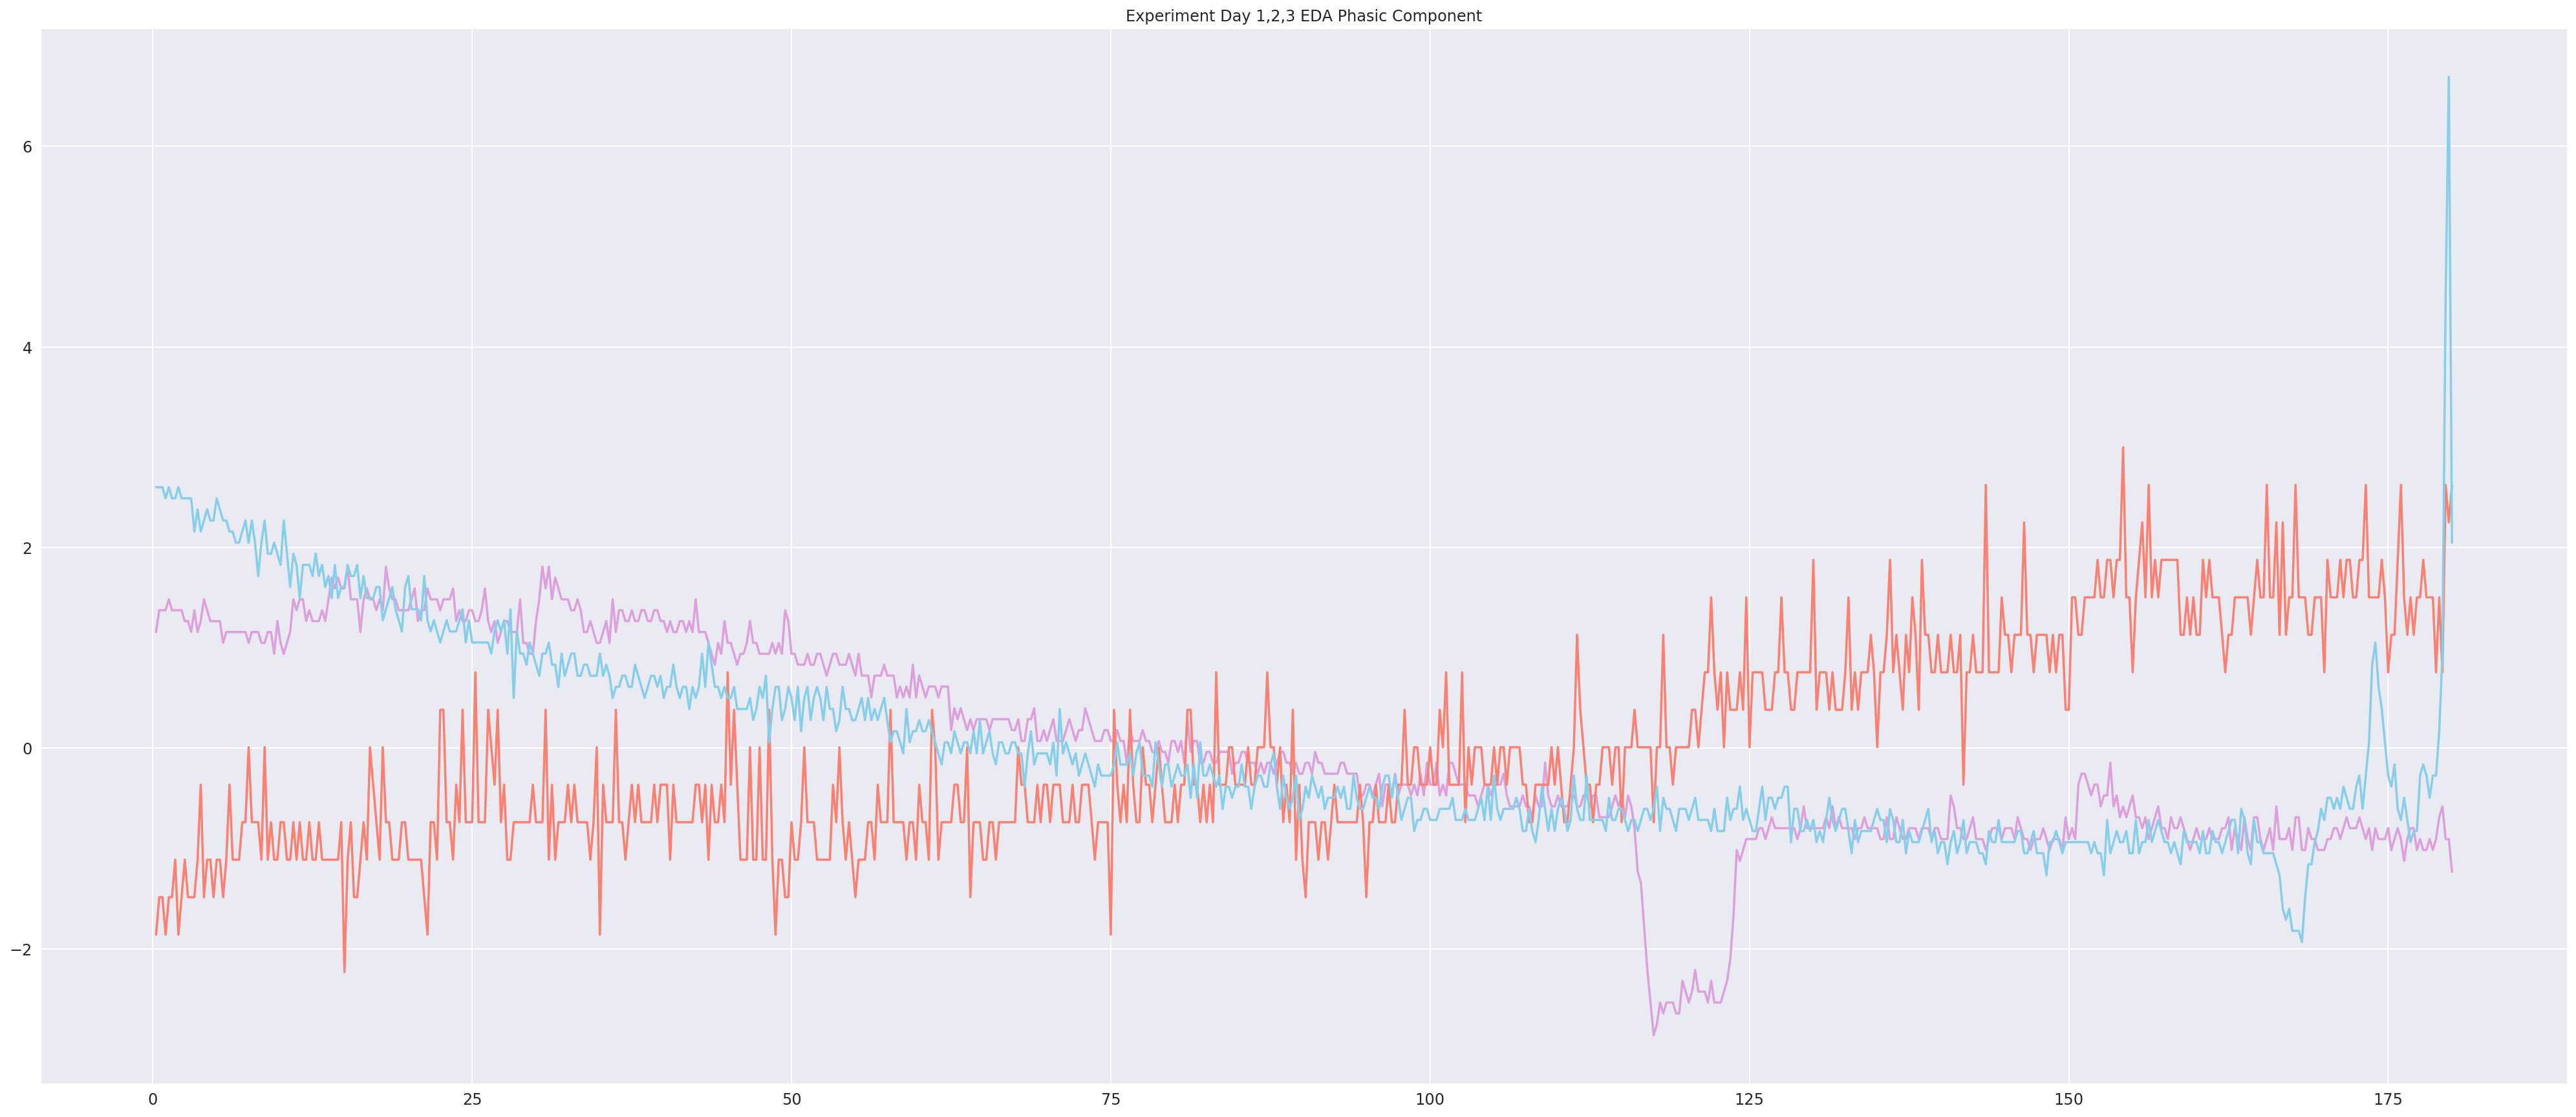

In [102]:
pl.figure(figsize=(35,15))
pl.hold(True)

pl.plot(tm0_3, yn0_3,color = 'plum')
pl.plot(tm1_3, yn1_3,color = 'salmon')
pl.plot(tm2_3, yn2_3,color = 'skyblue')
pl.title('Experiment Day 1,2,3 EDA Phasic Component')
pl.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


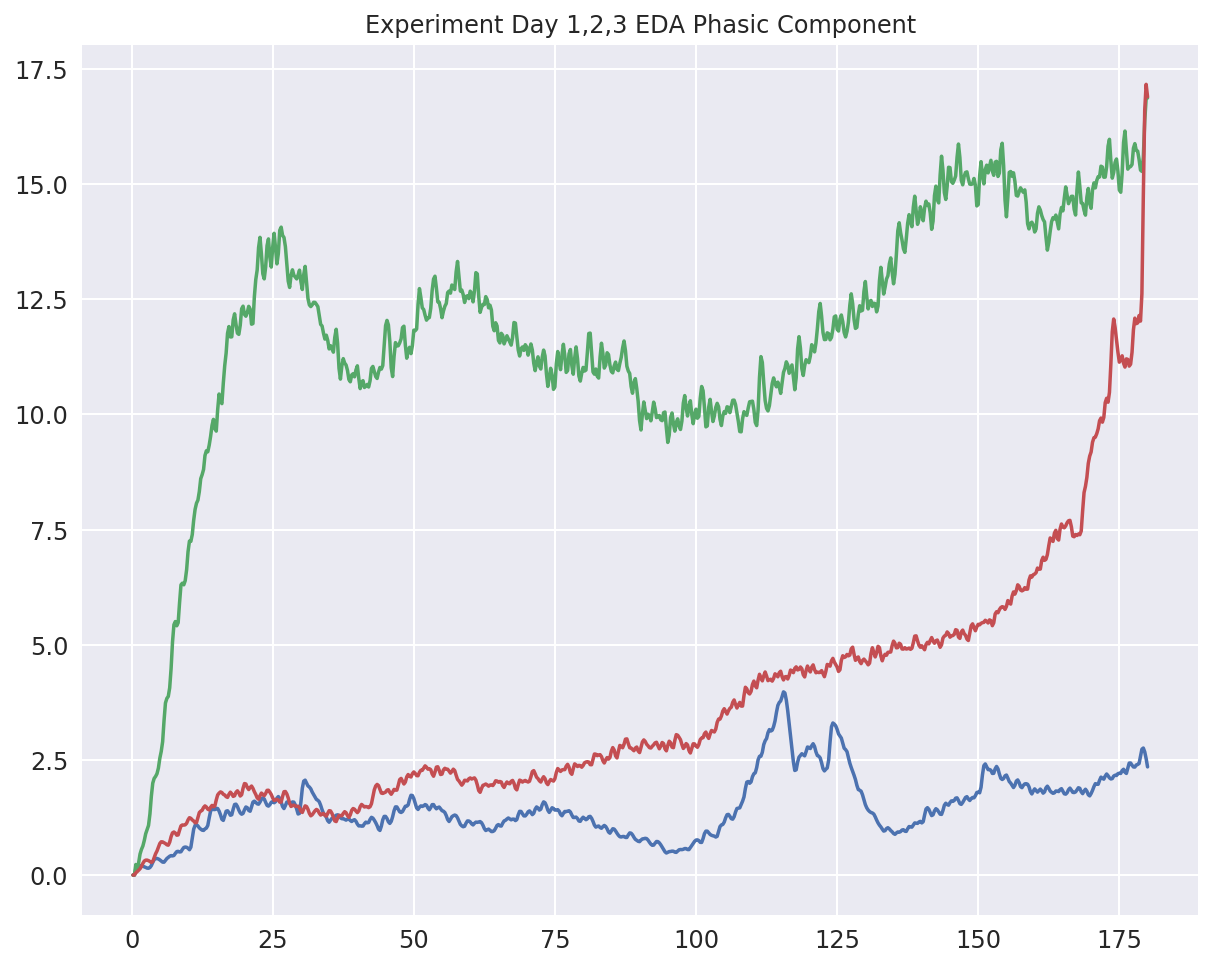

In [68]:
pl.hold(True)
# t_mean1_3 = np.mean(t1_3)
# plt.axhline(y = t_mean1_3,color = 'salmon',linestyle='--')
# pl.plot(tm, yn)
# pl.plot(tm, r)
# pl.plot(tm, p)
pl.plot(tm0_3, r0_3)
pl.plot(tm1_3, r1_3)
pl.plot(tm2_3, r2_3)
pl.title('Experiment Day 1,2,3 EDA Phasic Component')
pl.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


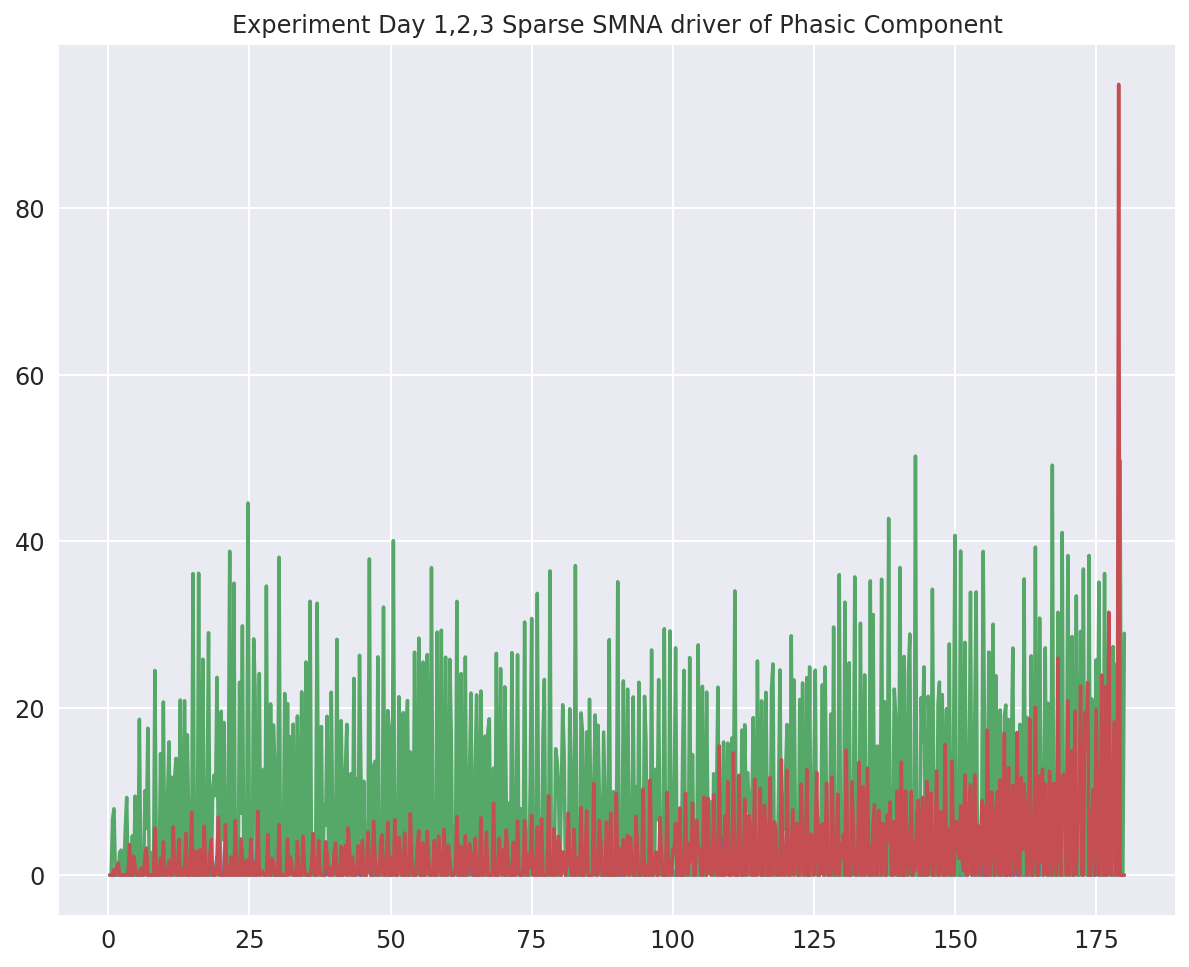

In [69]:
pl.hold(True)
# t_mean1_3 = np.mean(t1_3)
# plt.axhline(y = t_mean1_3,color = 'salmon',linestyle='--')
# pl.plot(tm, yn)
# pl.plot(tm, r)
# pl.plot(tm, p)
pl.plot(tm0_3, p0_3)
pl.plot(tm1_3, p1_3)
pl.plot(tm2_3, p2_3)
pl.title('Experiment Day 1,2,3 Sparse SMNA driver of Phasic Component')
pl.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


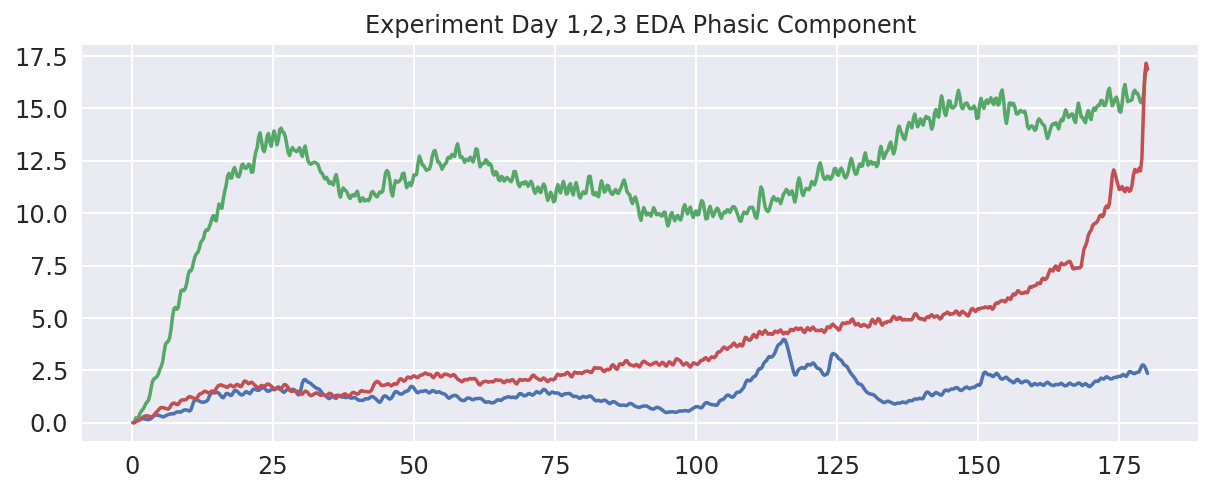

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  from ipykernel import kernelapp as app


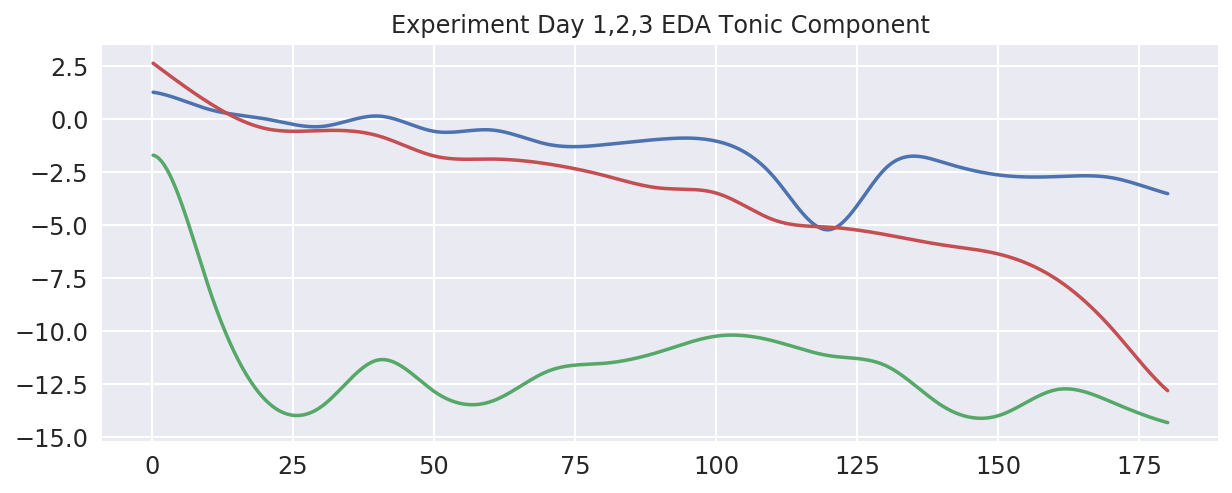

In [70]:
pl.subplot(211)
pl.hold(True)
# t_mean1_3 = np.mean(t1_3)
# plt.axhline(y = t_mean1_3,color = 'salmon',linestyle='--')
# pl.plot(tm, yn)
# pl.plot(tm, r)
# pl.plot(tm, p)
pl.plot(tm0_3, r0_3)
pl.plot(tm1_3, r1_3)
pl.plot(tm2_3, r2_3)
pl.title('Experiment Day 1,2,3 EDA Phasic Component')
pl.show()

pl.subplot(212)
pl.hold(True)
# t_mean1_3 = np.mean(t1_3)
# plt.axhline(y = t_mean1_3,color = 'salmon',linestyle='--')
# pl.plot(tm, yn)
# pl.plot(tm, r)
# pl.plot(tm, p)
pl.plot(tm0_3, t0_3)
pl.plot(tm1_3, t1_3)
pl.plot(tm2_3, t2_3)
pl.title('Experiment Day 1,2,3 EDA Tonic Component')
pl.show()

# K-means Analysis 

## Day 0 Experiment Clustering 

Text(0.5,1,'Tonic vs Phasic Components')

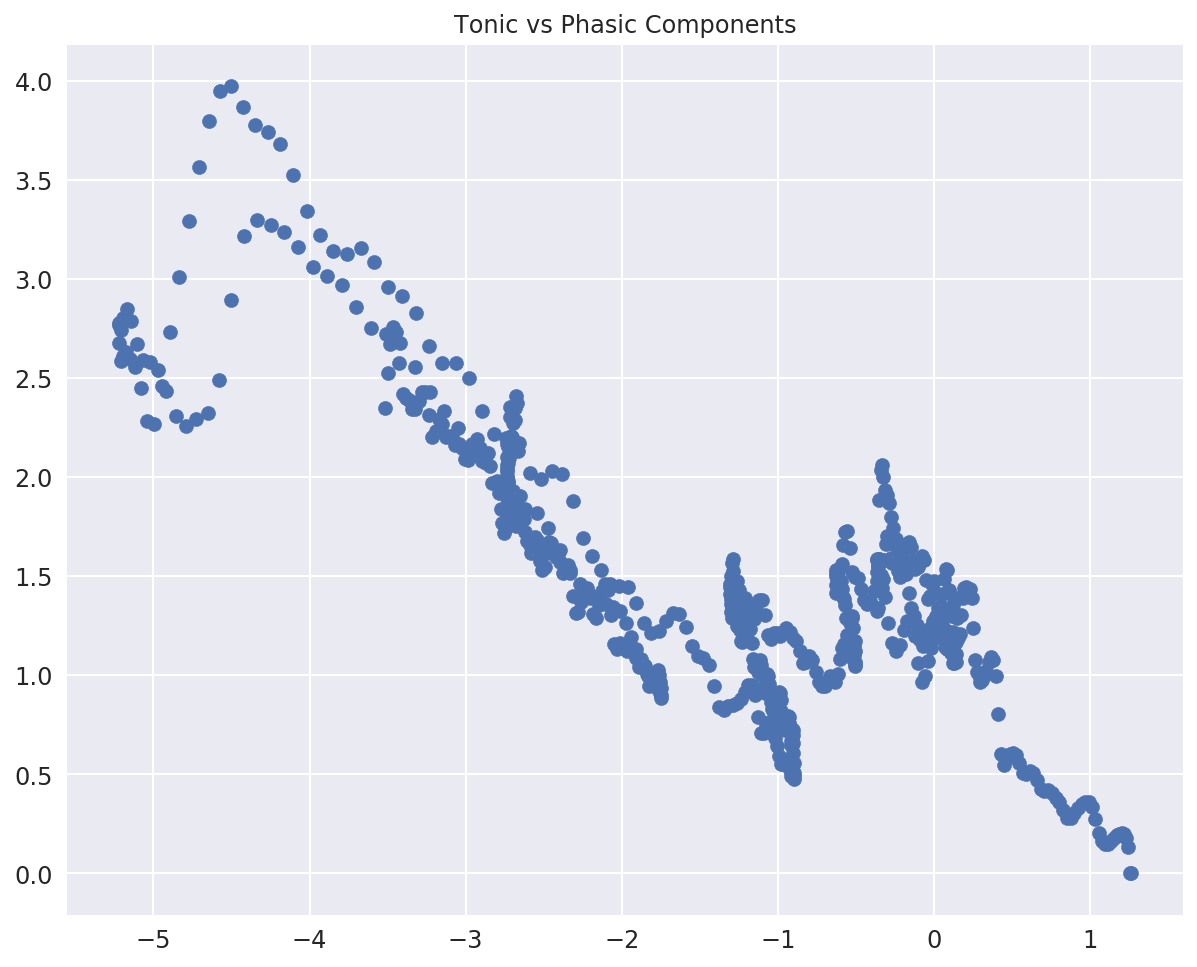

In [71]:
plt.scatter(t0_3, r0_3)
plt.title('Tonic vs Phasic Components')

Text(0.5,0.92,'Tonic, Phasic and SMNA driver of Phasic')

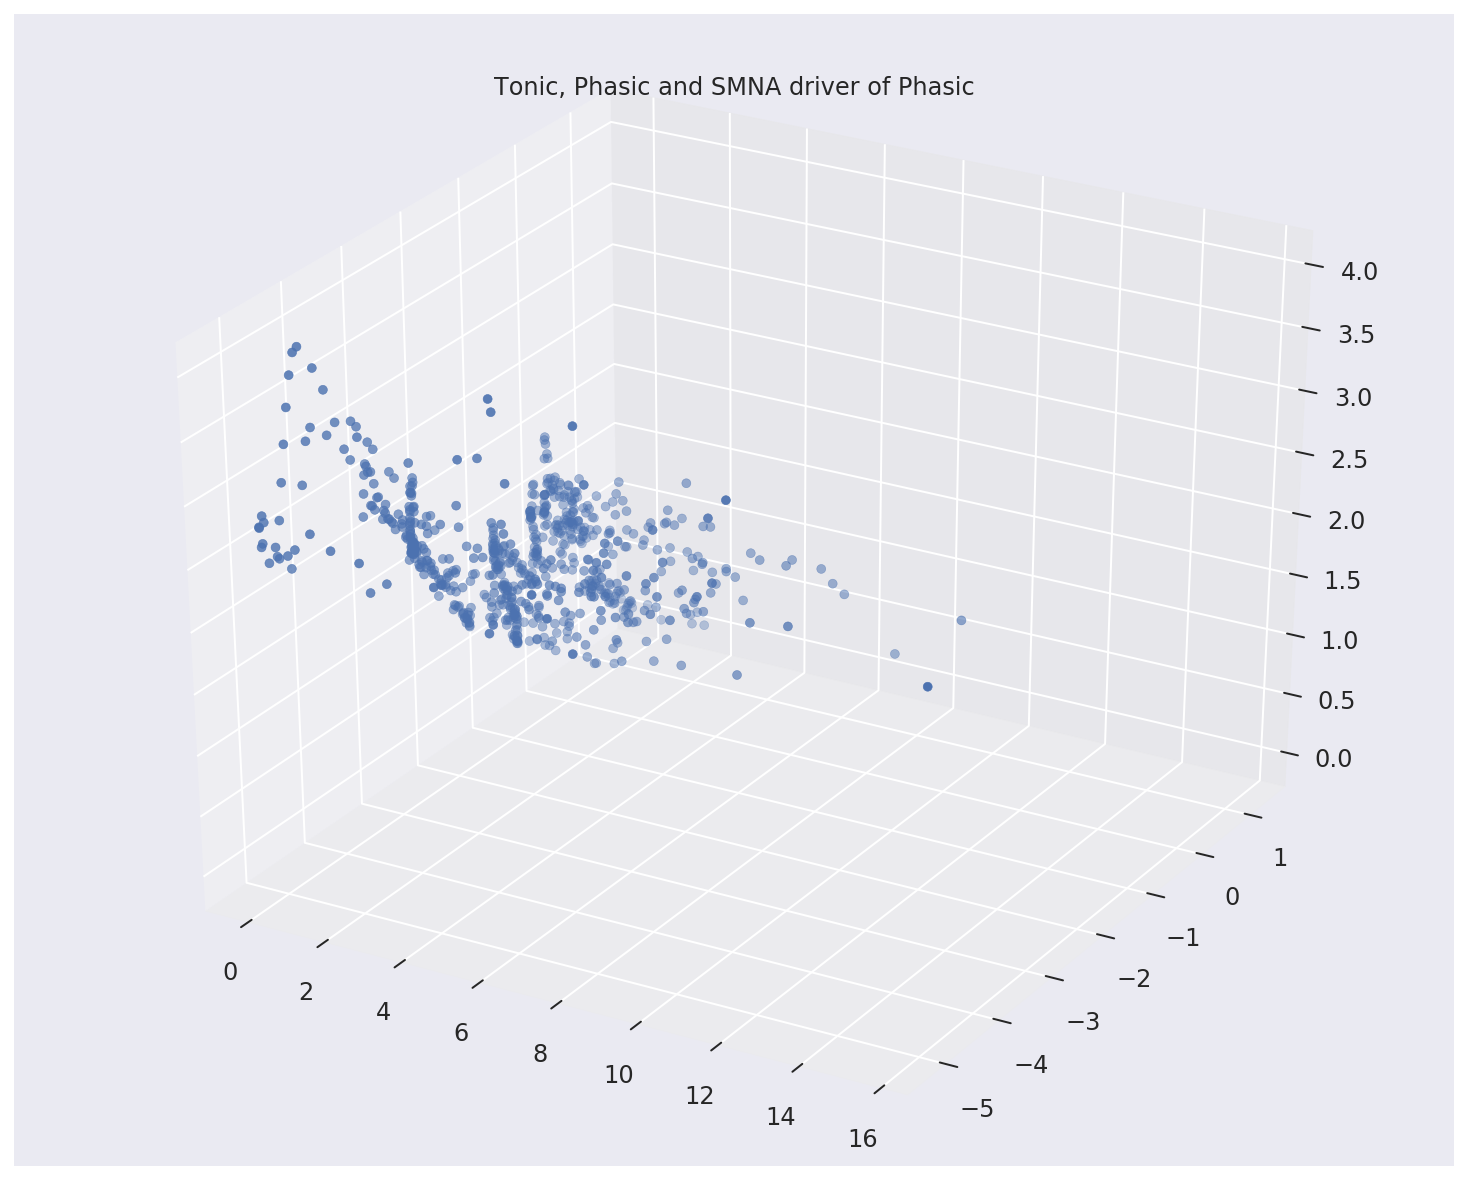

In [72]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(p0_3, t0_3, r0_3)
plt.title('Tonic, Phasic and SMNA driver of Phasic')

In [73]:
day0_2 = np.transpose(np.vstack((t0_3,r0_3)))
print(day0_2.shape)

day0_3 = np.transpose(np.vstack((p0_3,t0_3,r0_3)))
print(day0_3.shape)

(720, 2)
(720, 3)


## 2D plot

In [74]:
# Initializing KMeans
kmeans_2 = KMeans(n_clusters=4)
# Fitting with inputs
kmeans_2 = kmeans_2.fit(day0_2)
# Predicting the clusters
labels_2 = kmeans_2.predict(day0_2)
# Getting the cluster centers
C_2 = kmeans_2.cluster_centers_

Text(0.5,1,'K-means Clustering - Tonic vs Phasic Components of SC')

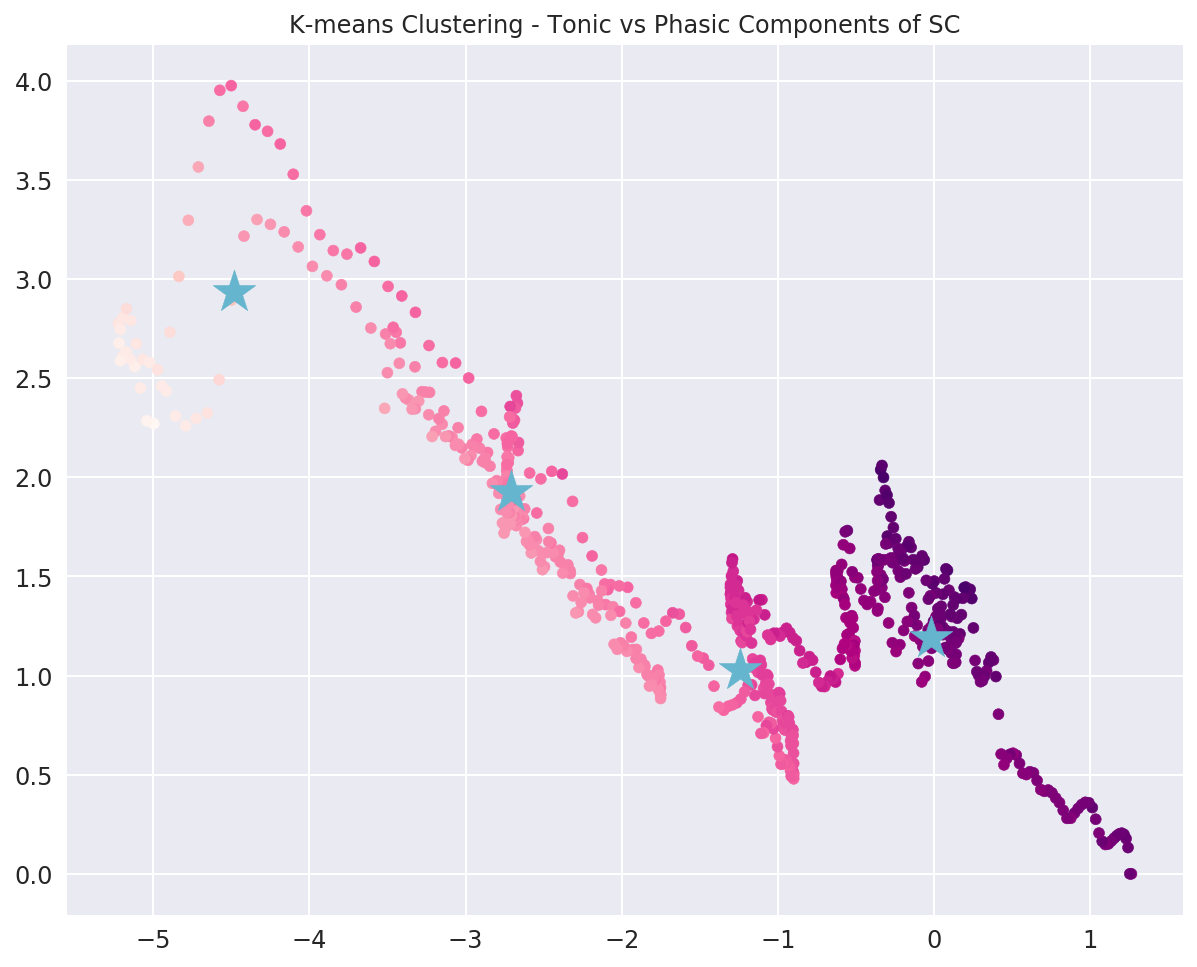

In [75]:
plt.scatter(day0_2[:, 0], day0_2[:, 1], c=yn0_3,
            s=30, cmap='RdPu');
plt.scatter(C_2[:, 0], C_2[:, 1], marker='*',c='c', s=500)
plt.title('K-means Clustering - Tonic vs Phasic Components of SC')

## 3D plot

In [76]:
# Initializing KMeans
kmeans_3 = KMeans(n_clusters=4)
# Fitting with inputs
kmeans_3 = kmeans_3.fit(day0_3)
# Predicting the clusters
labels_3 = kmeans_3.predict(day0_3)
# Getting the cluster centers
C_3 = kmeans_3.cluster_centers_

Text(0.5,0.92,'K-means Clustering - Tonic vs Phasic Components of SC')

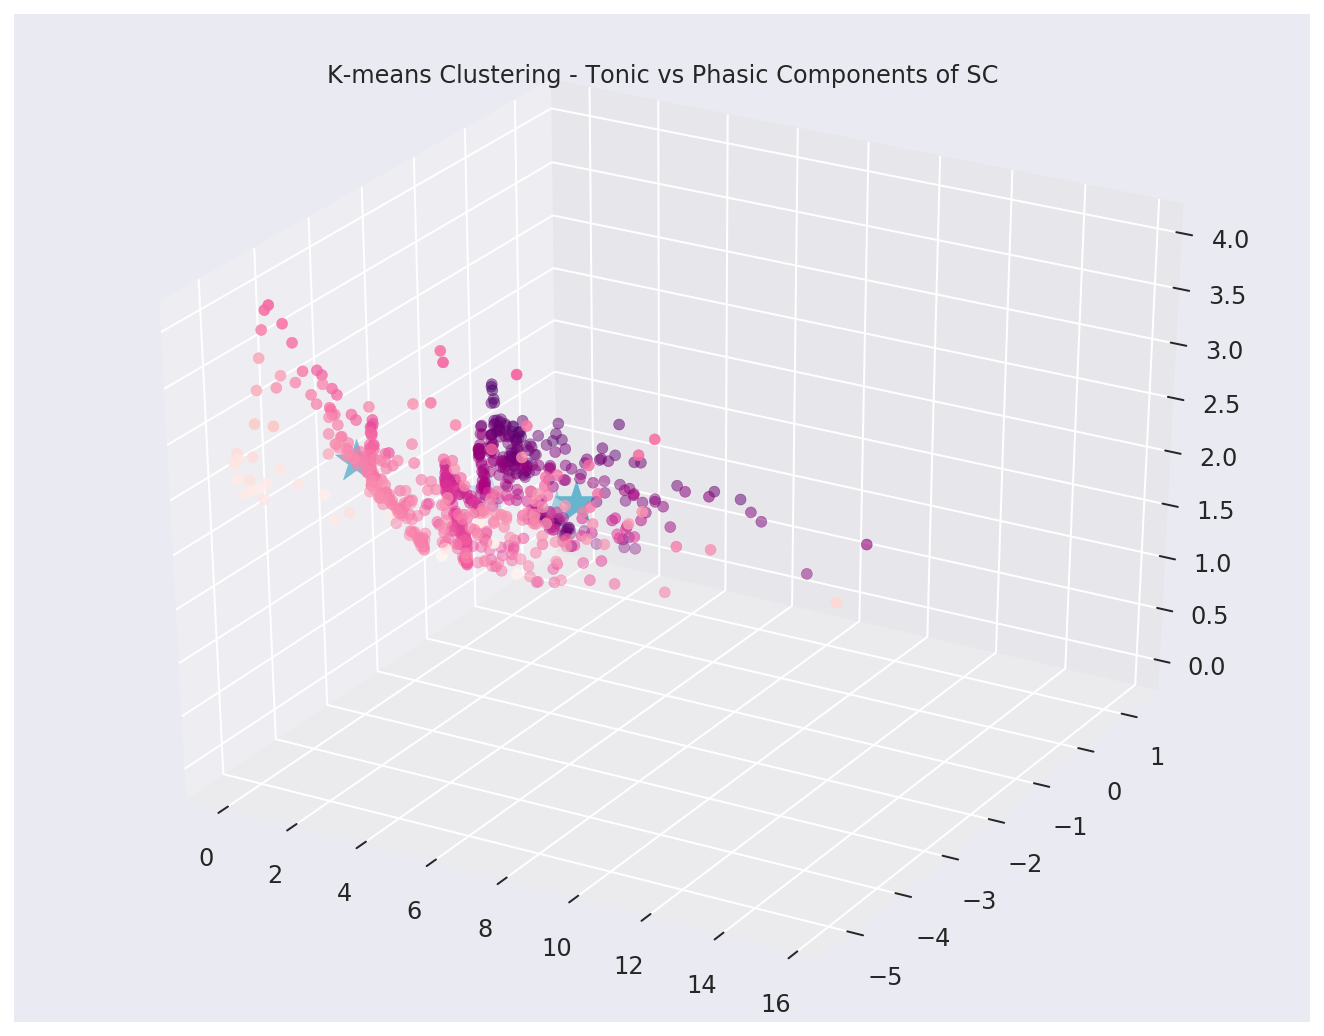

In [77]:
plt.rcParams['figure.figsize'] = (9, 7)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(day0_3[:, 0], day0_3[:, 1], day0_3[:, 2], c = y0_3, cmap = 'RdPu', s=30)
ax.scatter(C_3[:, 0], C_3[:, 1], C_3[:, 2], marker='*',c='c', s=500)
plt.title('K-means Clustering - Tonic vs Phasic Components of SC')

## 2D & 3D Plots

Text(0.5,0.92,'K-means Clustering 3D - Tonic vs Phasic Components of SC')

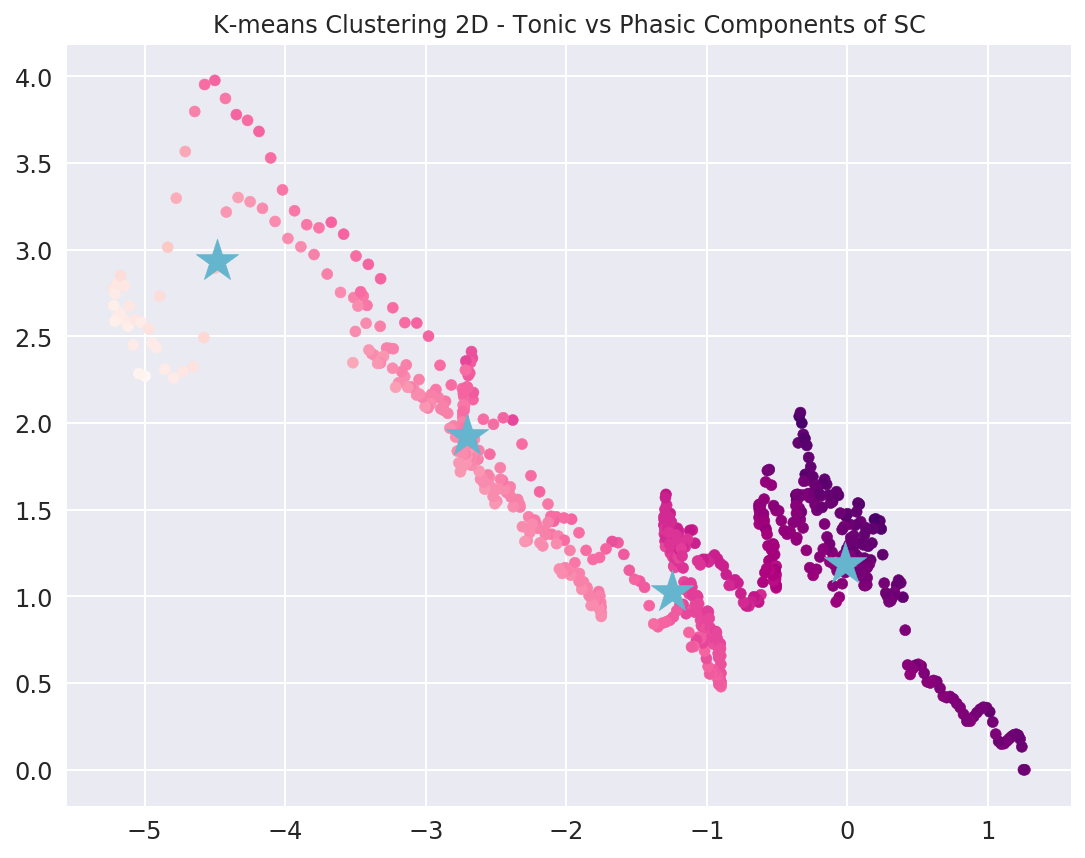

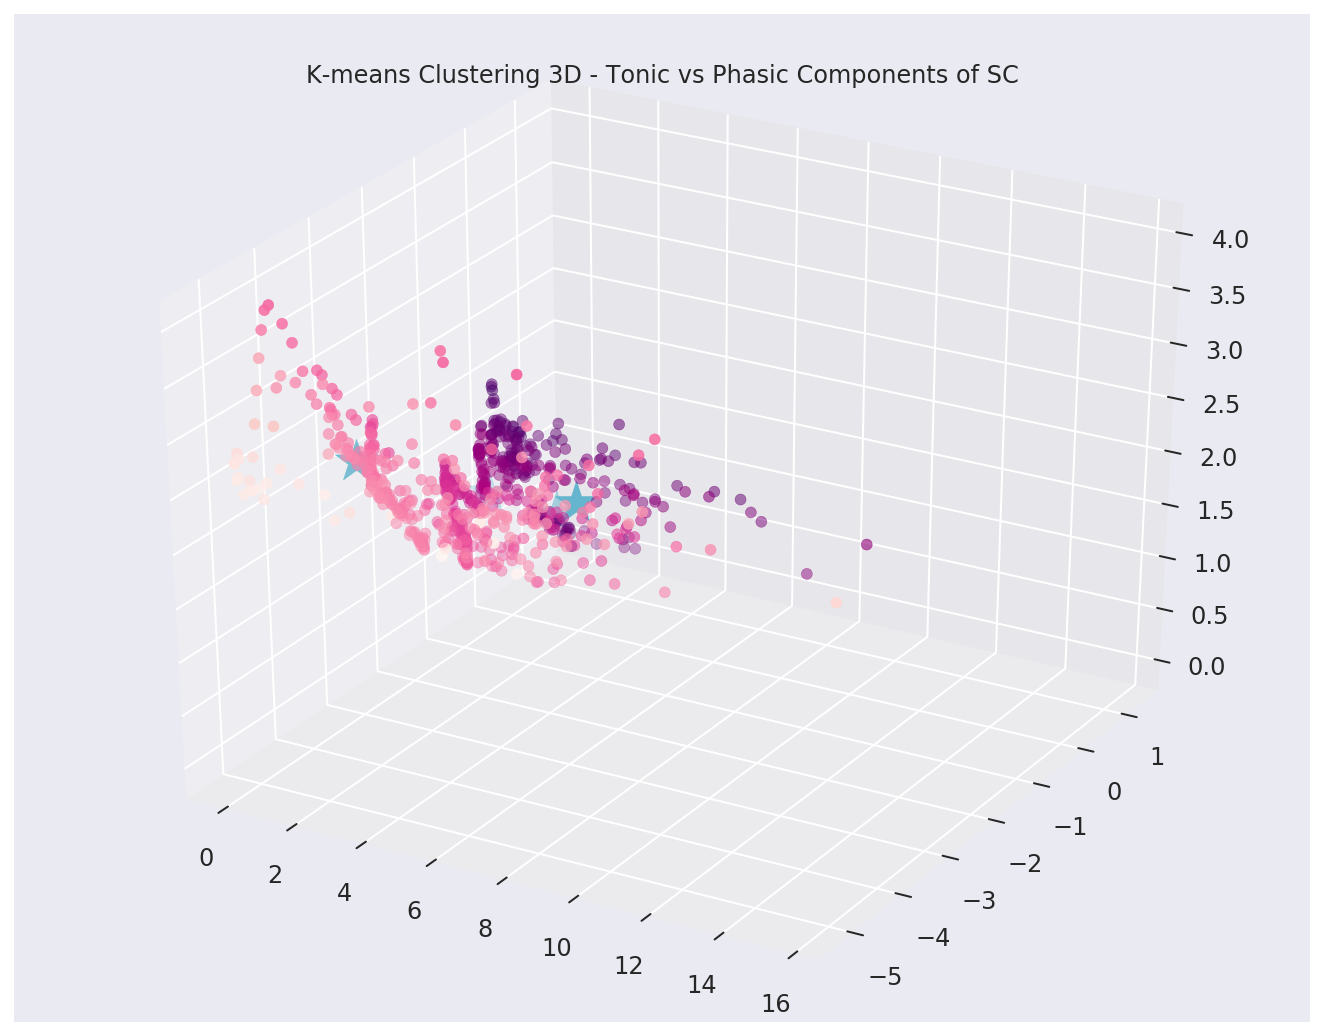

In [78]:
plt.subplot(111)
plt.scatter(day0_2[:, 0], day0_2[:, 1], c=yn0_3, s=30, cmap='RdPu')
plt.scatter(C_2[:, 0], C_2[:, 1], marker='*',c='c', s=500)
plt.title('K-means Clustering 2D - Tonic vs Phasic Components of SC')

# plt.subplot(212)
# # plt.rcParams['figure.figsize'] = (9, 7)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(day0_3[:, 0], day0_3[:, 1], day0_3[:, 2], c = y0_3, cmap = 'RdPu', s=30)
ax.scatter(C_3[:, 0], C_3[:, 1], C_3[:, 2], marker='*',c='c', s=500)
plt.title('K-means Clustering 3D - Tonic vs Phasic Components of SC')

### Kolmogorov–Smirnov Test

In [79]:
ks_2samp(fl_day1, fl_day2)

ValueError: object too deep for desired array

The p-value of Kolmogorov-Smirnov Test is < 0.01, so we can reject the null hypothesis that the SC signals are drawn from same distributions.



# ANOVA Test

# EDA Feature Extraction 